In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

## 1. Understanding the Dataset

In [2]:
# Loading the data
df = pd.read_csv('../data/final_scout_not_dummy.csv')

- Preview the Data:

In [3]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


- Preview data information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


- Check for Missing Values

In [6]:
#checking for null value
df.isna().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

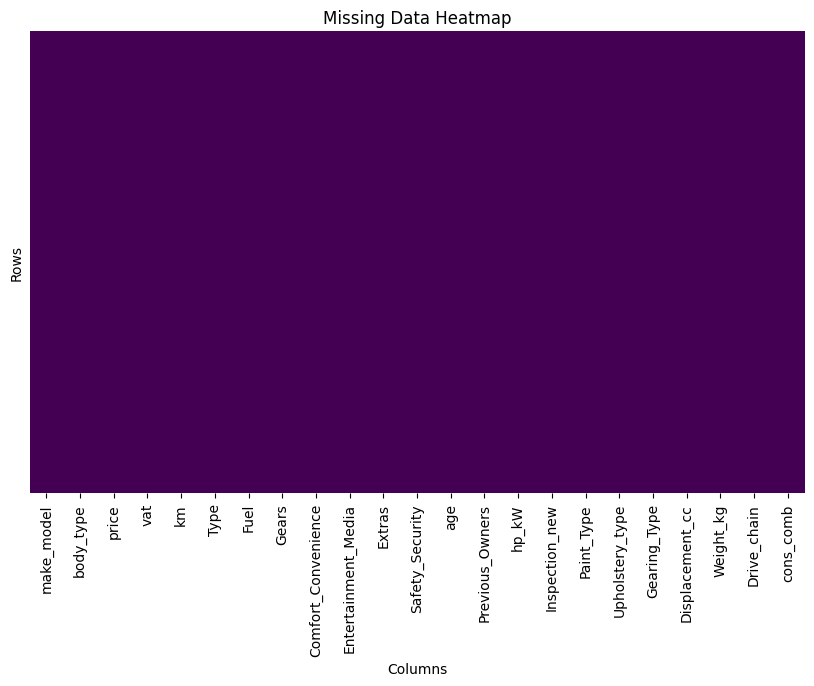

In [7]:
# Check for missing data
missing_data = df.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

### Insight
- No missing value

### 2. Target Variable Analysis

- Distribution of the Target Variable:

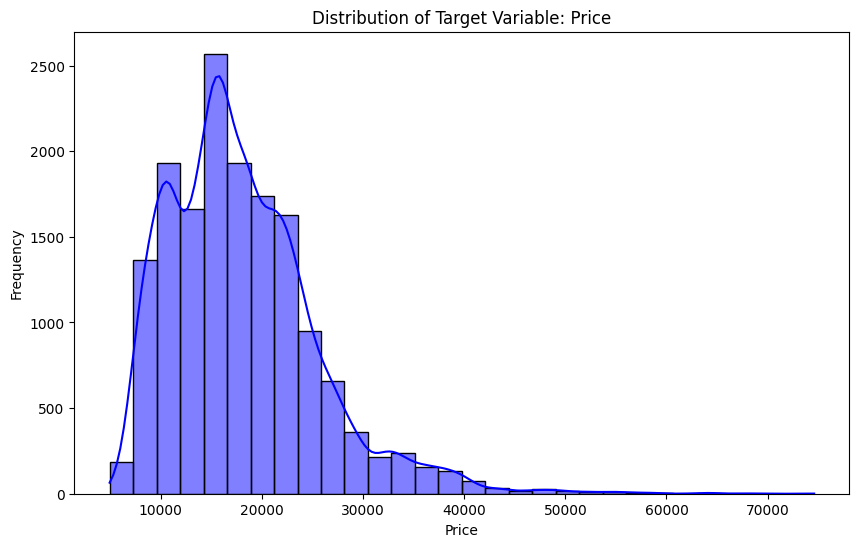

In [8]:
# distribution od the target variable
plt.figure(figsize=(10, 6))

# Histogram with KDE
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title("Distribution of Target Variable: Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [9]:
from scipy.stats import skew

# Calculate skewness
skewness_value = skew(df['price'], nan_policy='omit')  # 'price' is the target variable
print(f"Skewness of the target variable: {skewness_value}")

Skewness of the target variable: 1.2360529000082296


`Interpretation:`

- Skewness = 0: Perfectly symmetrical (normal distribution).
- Skewness > 0: Positively skewed (tail to the right).
- Skewness < 0: Negatively skewed (tail to the left).


In [10]:
from scipy.stats import shapiro

stat, p = shapiro(df['price'])
if p > 0.05:
    print("Data appears to be normally distributed.")
else:
    print("Data is not normally distributed (skewed).")


Data is not normally distributed (skewed).


### Insight 
The skewness value of 1.236 indicates that the target variable (price) is positively skewed, meaning the distribution has a longer tail on the right-hand side.

- Handling Skewness

In [11]:
#Apply a log transformation to compress the higher values:
df['price_log'] = np.log1p(df['price'])  # Use log1p to handle zeros

- checking the distribution again after handling the skewness of the target value

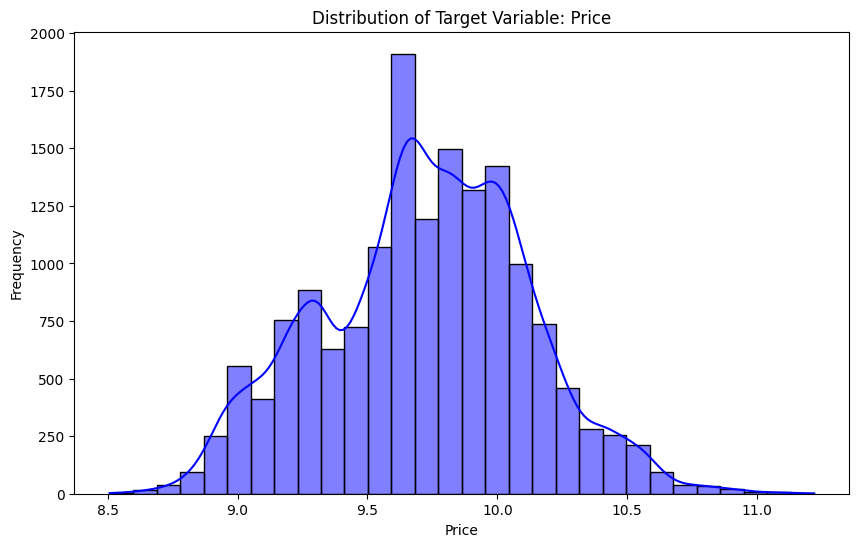

In [12]:
# distribution od the target variable
plt.figure(figsize=(10, 6))

# Histogram with KDE
sns.histplot(df['price_log'], kde=True, bins=30, color='blue')
plt.title("Distribution of Target Variable: Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [13]:
from scipy.stats import skew

# Calculate skewness
skewness_value = skew(df['price_log'], nan_policy='omit')  # 'price' is the target variable
print(f"Skewness of the target variable: {skewness_value}")

Skewness of the target variable: -0.031470675256070633


`Interpretation`
- -0.031 is very close to 0, meaning the distribution is almost perfectly normal.
- This transformation has effectively removed the positive skewness, making the target variable more suitable for modeling.

## 3. Univariate Analysis

1. Numeric Features: Distribution and Outliers
We will:

- Plot histograms and KDE plots for numeric features to understand their distribution.
- Use boxplots to detect outliers.

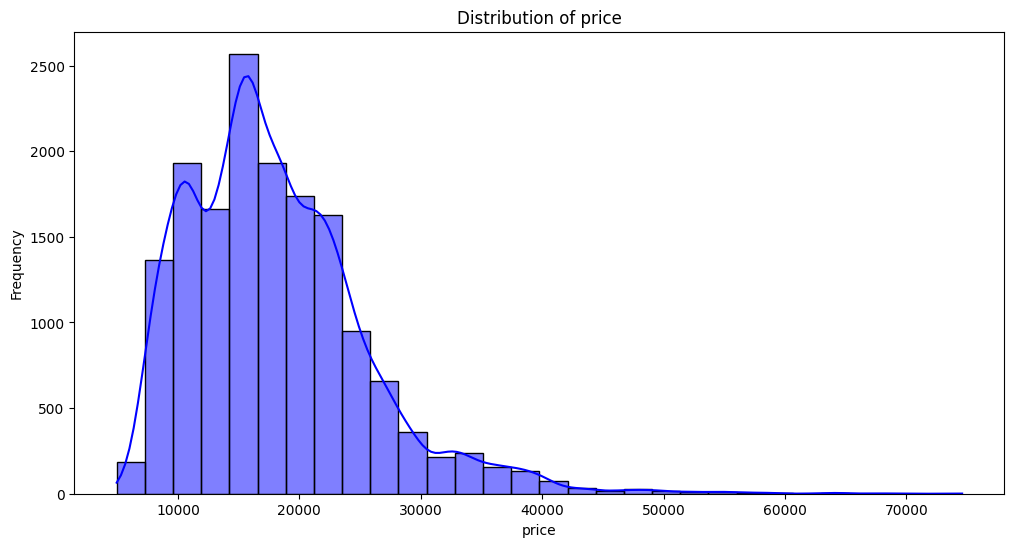

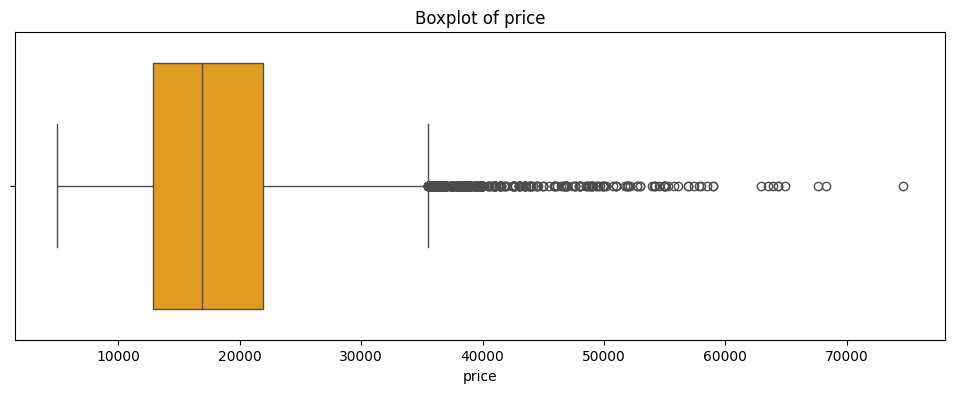

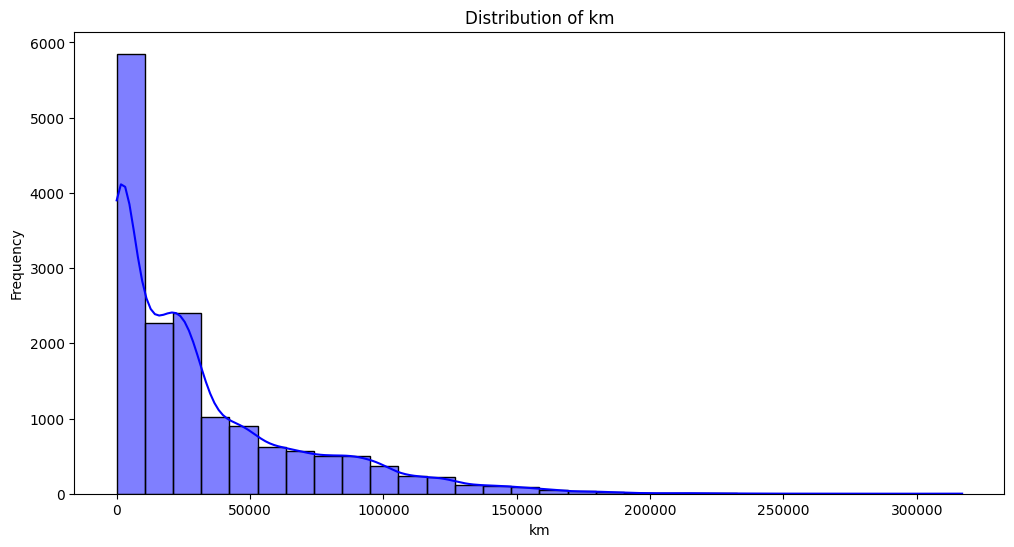

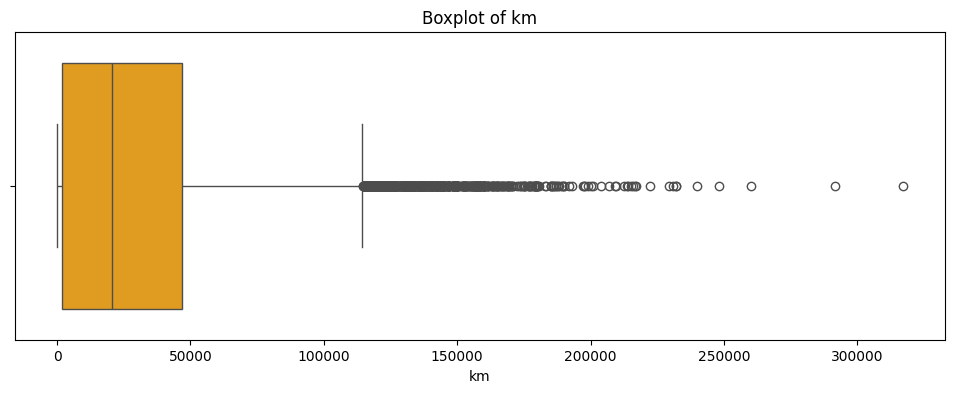

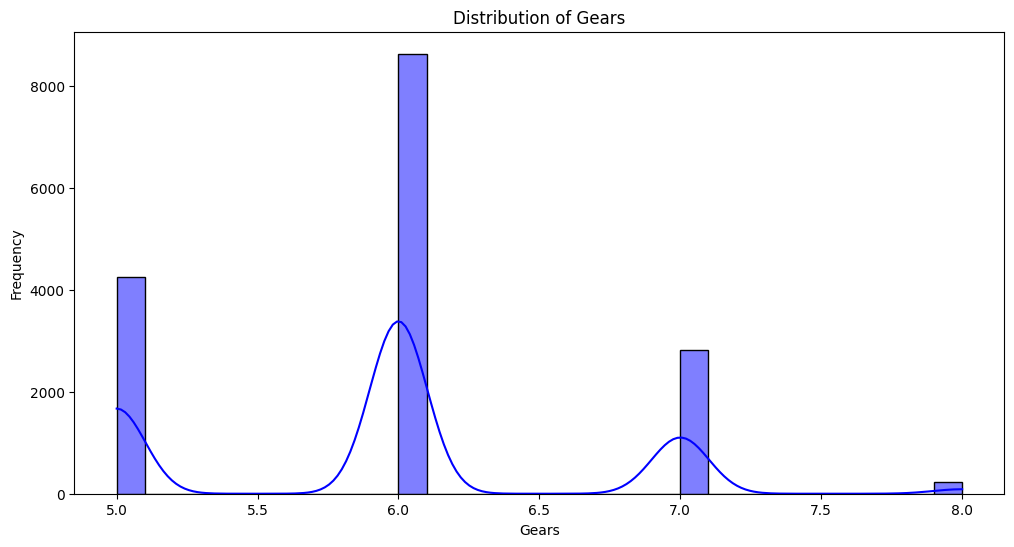

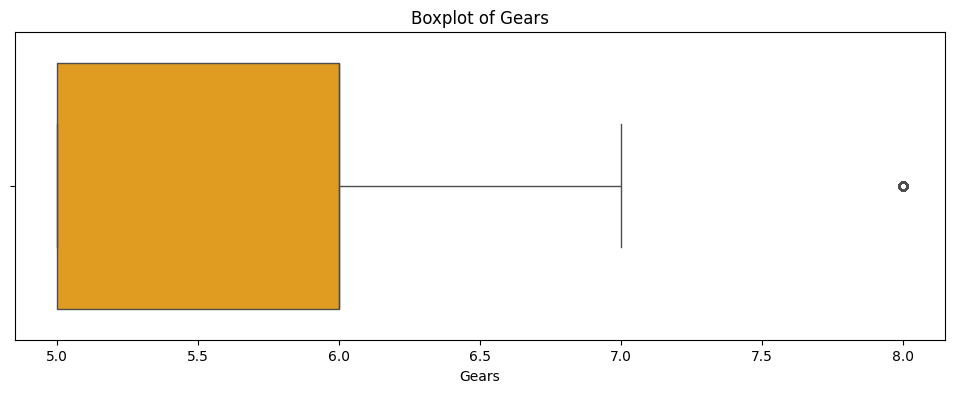

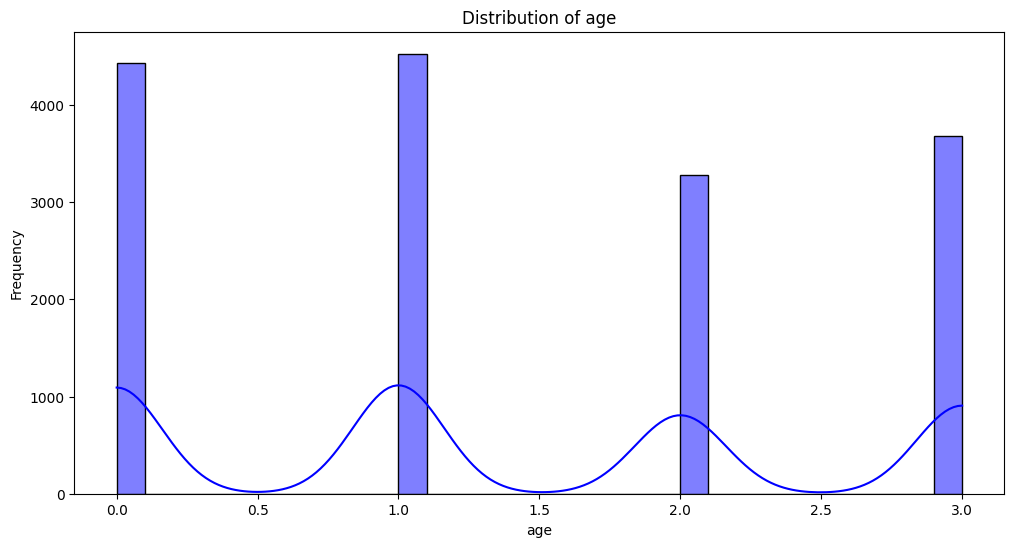

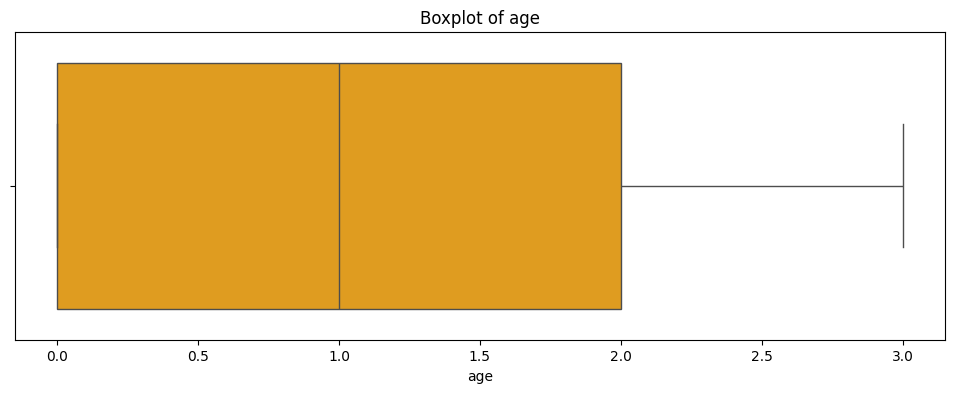

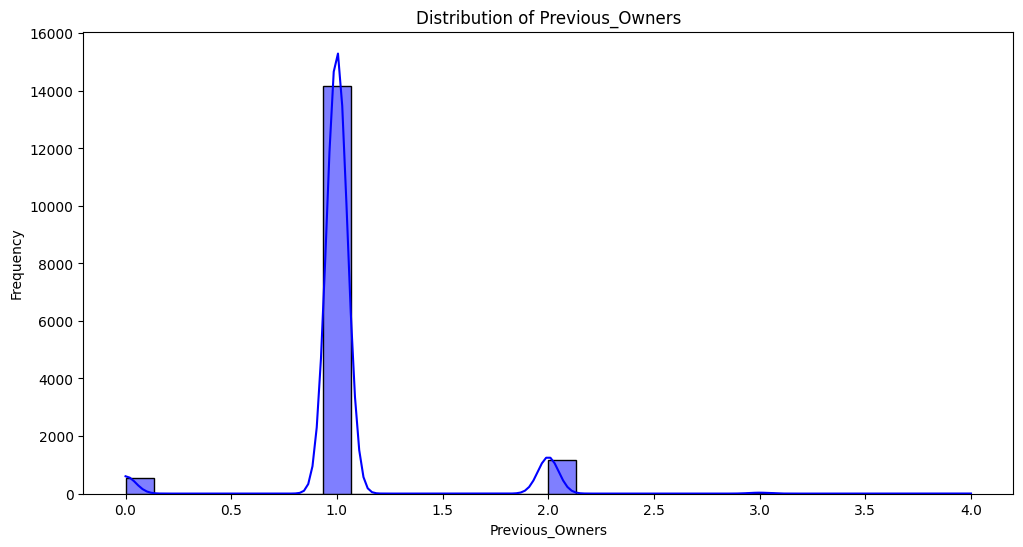

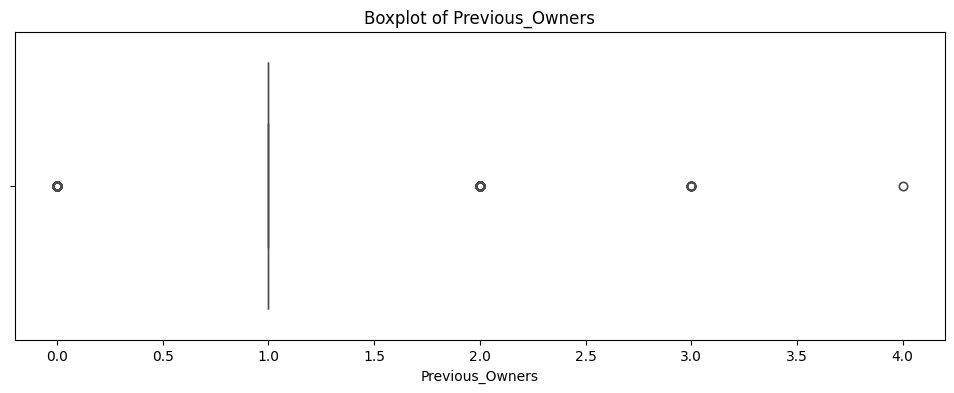

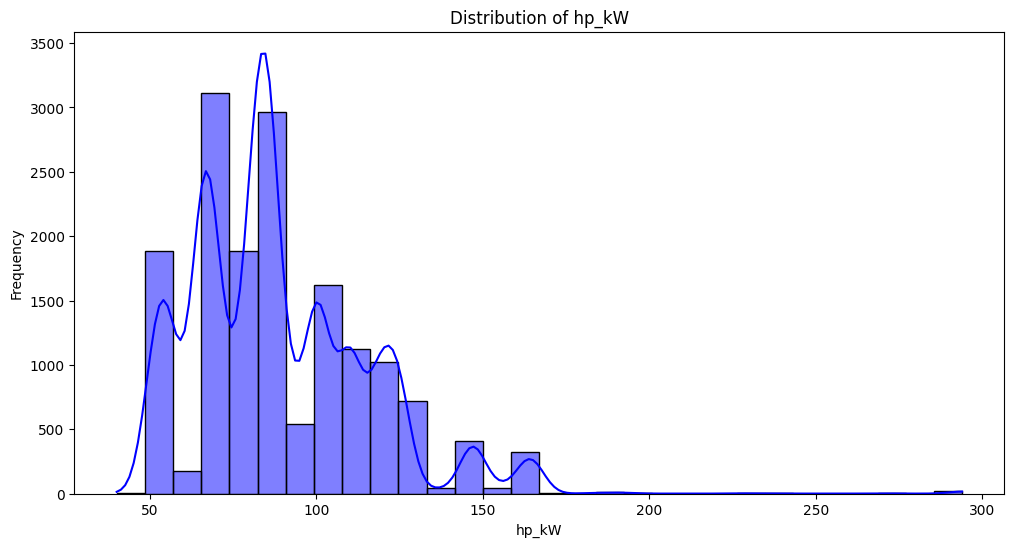

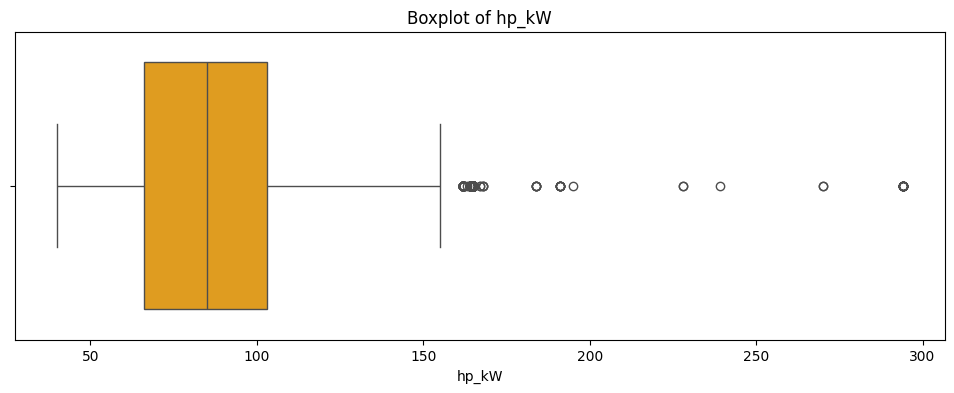

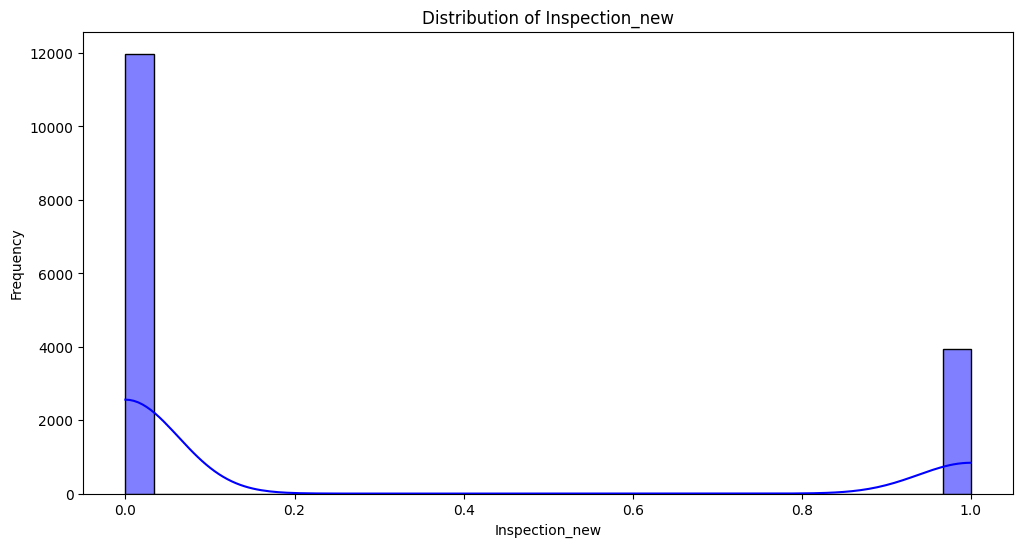

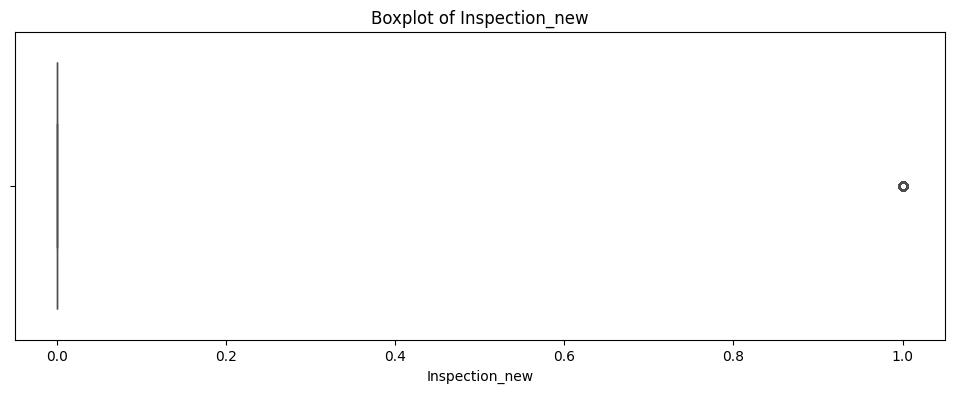

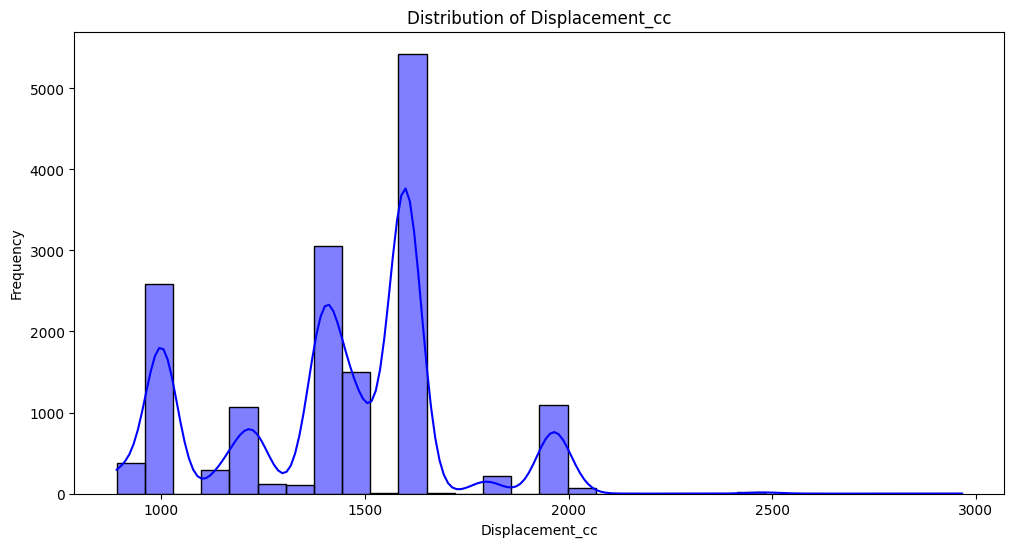

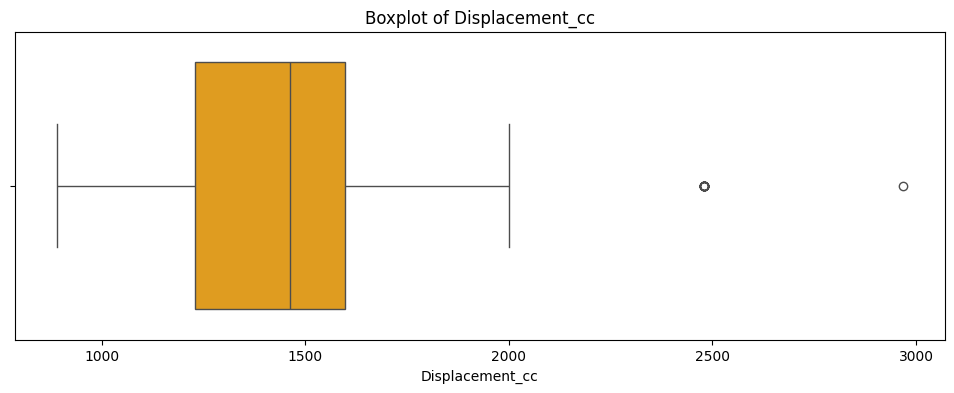

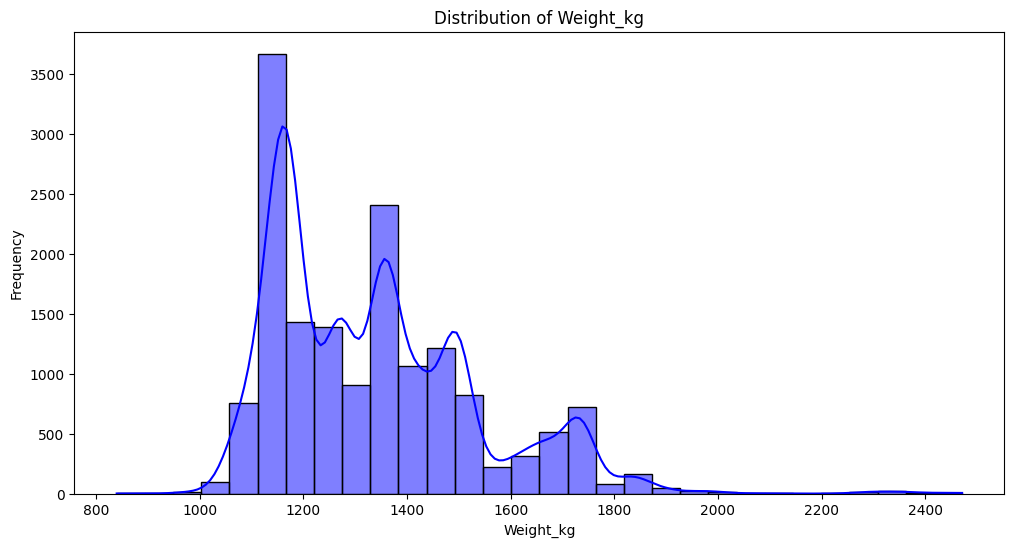

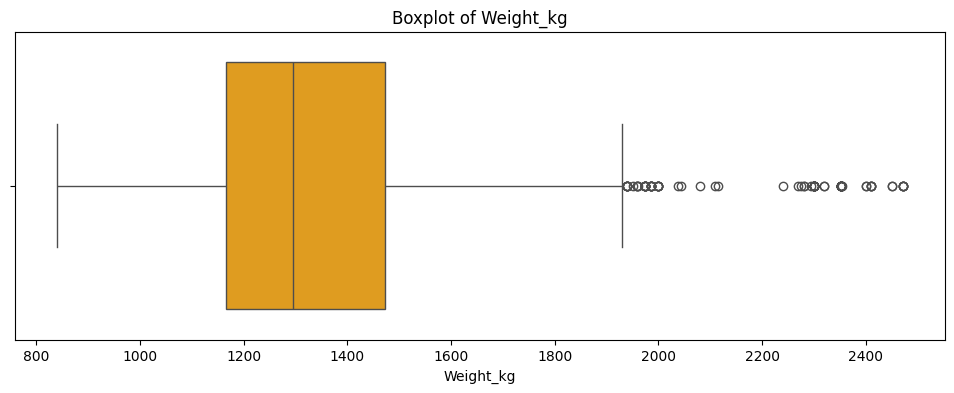

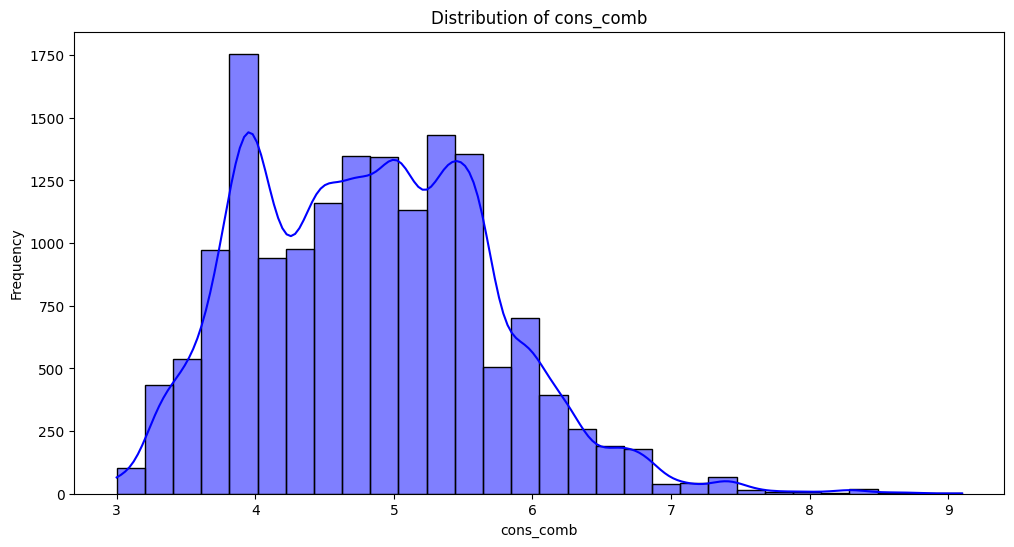

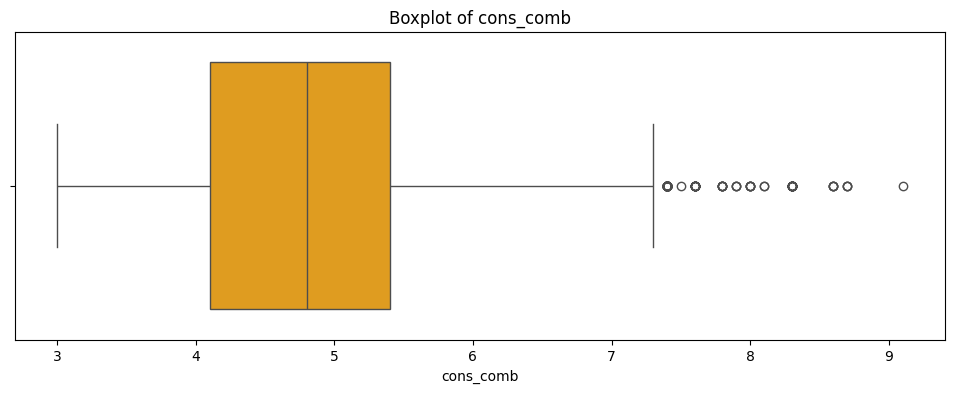

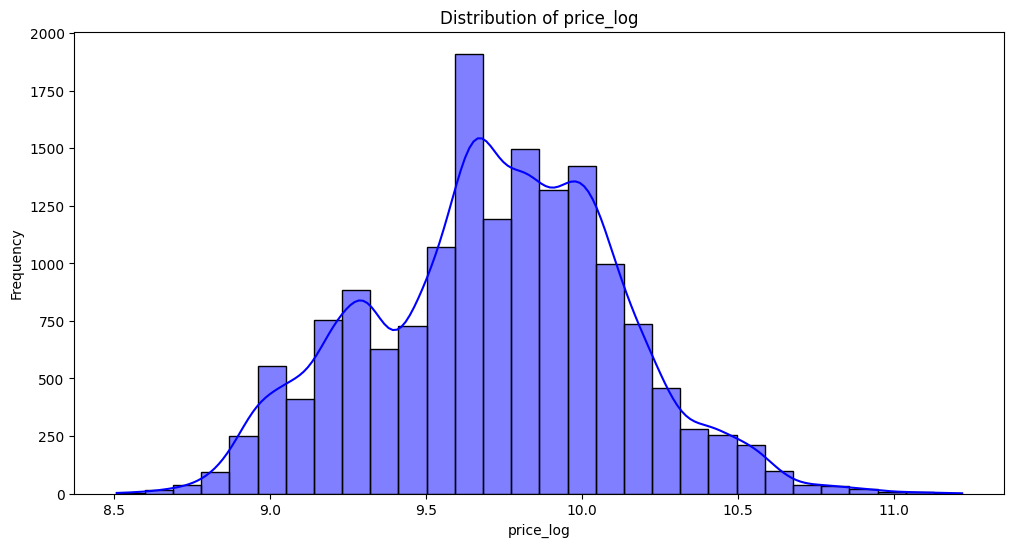

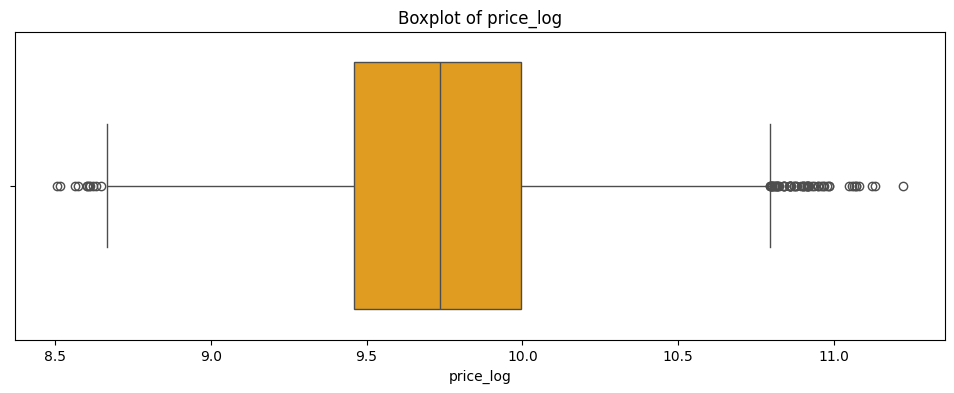

In [14]:
# Numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms and KDE plots
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    
    # Histogram + KDE
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    
    # Boxplot to detect outliers
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

Insight:
- From the distribution there are a lot outlier in the most of the feature this will be handle in the feature engineering face.

2. Categorical Features: Frequency Distribution
- We will use bar plots to analyze the frequency distribution of categorical features.

#### Handling the high cardinality category

In [15]:
# Checking the unique value the categorical data
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for i in categorical_cols :
    print('=======',i)
    print(df[i].unique())

======= make_model
['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
======= body_type
['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Off-Road' 'Convertible'
 'Transporter']
======= vat
['VAT deductible' 'Price negotiable']
======= Type
['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
======= Fuel
['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
======= Comfort_Convenience
['Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system'
 'Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop system,Tinted windows'
 'Air conditioning,Cruise control,Electrical side mirror

Insight
- Comfort_Convenience, Entertainment_Media, Safety_Security and Extras are have high cardinality

- Focus on the most frequent categories (e.g., top 10) and group the rest as "Other".

In [16]:
# Define the column with high-cardinality
high_cardinality_column = ['Comfort_Convenience','Entertainment_Media','Safety_Security','Extras']

# Retain top 10 categories
top_n = 10
for i in high_cardinality_column:
    top_categories = df[i].value_counts().index[:top_n]
    # Transform the column
    df[i] = df[i].apply(
        lambda x: x if x in top_categories else 'Other'
        )
    # Check the transformed column
    print(df[i].value_counts())


Comfort_Convenience
Other                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          14317
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                               388
Air condit

- Truncating categorical feature with long text row for easy visualization

In [17]:
for i in high_cardinality_column:
    # Truncate text to 20 characters
    df[i] = df[i].apply(lambda x: x[:20] if isinstance(x, str) else x)

* Visualizing the frequency distribution of categorical feature

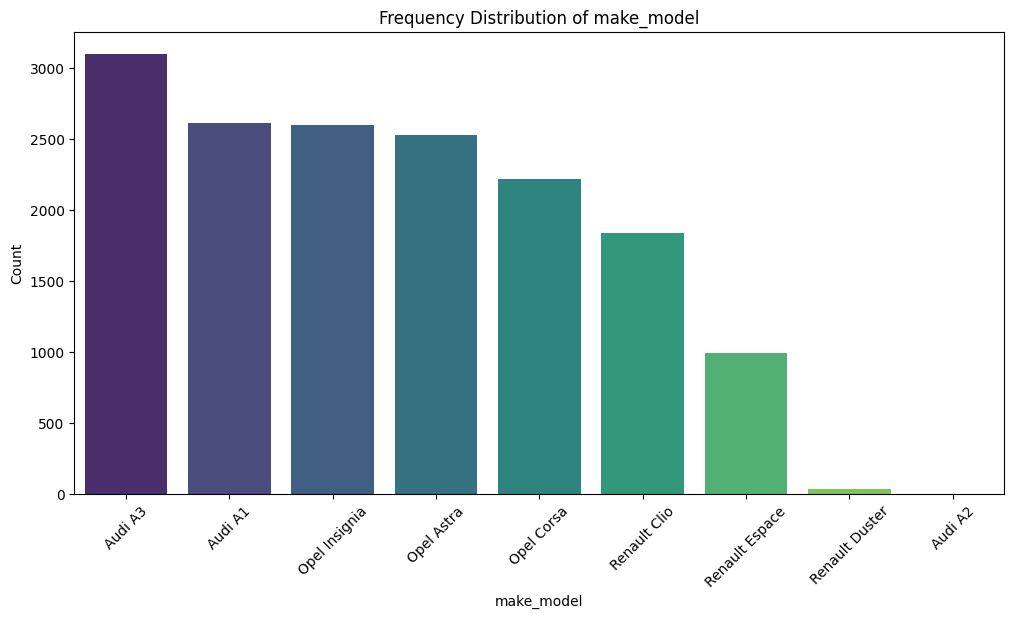

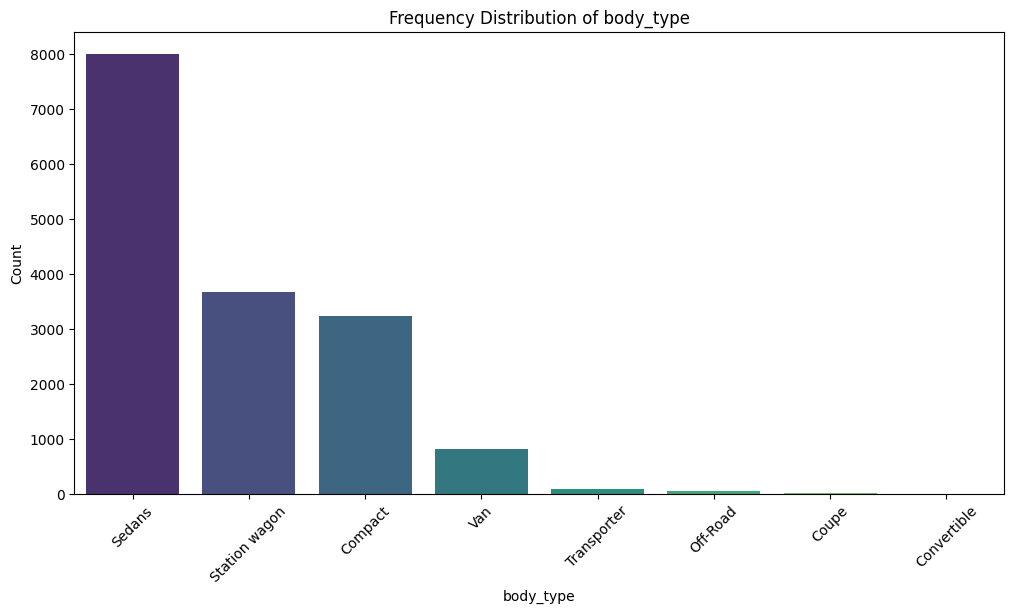

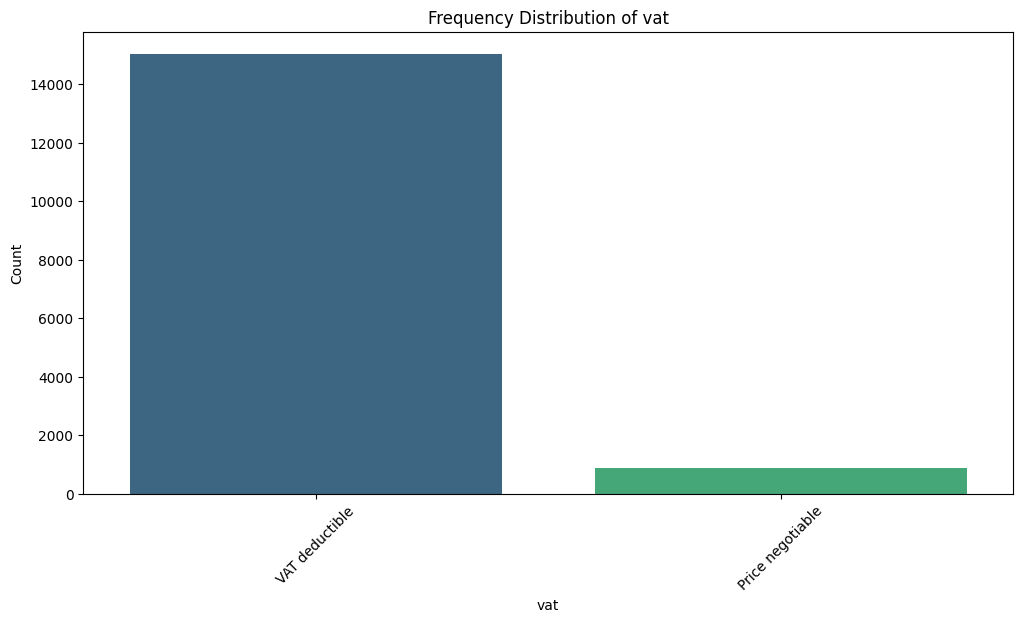

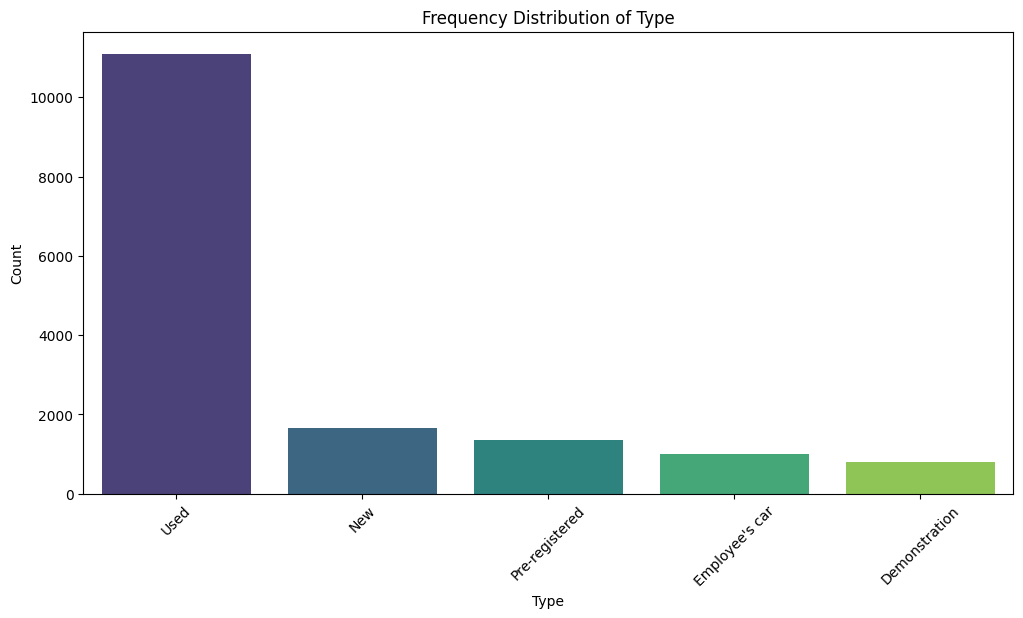

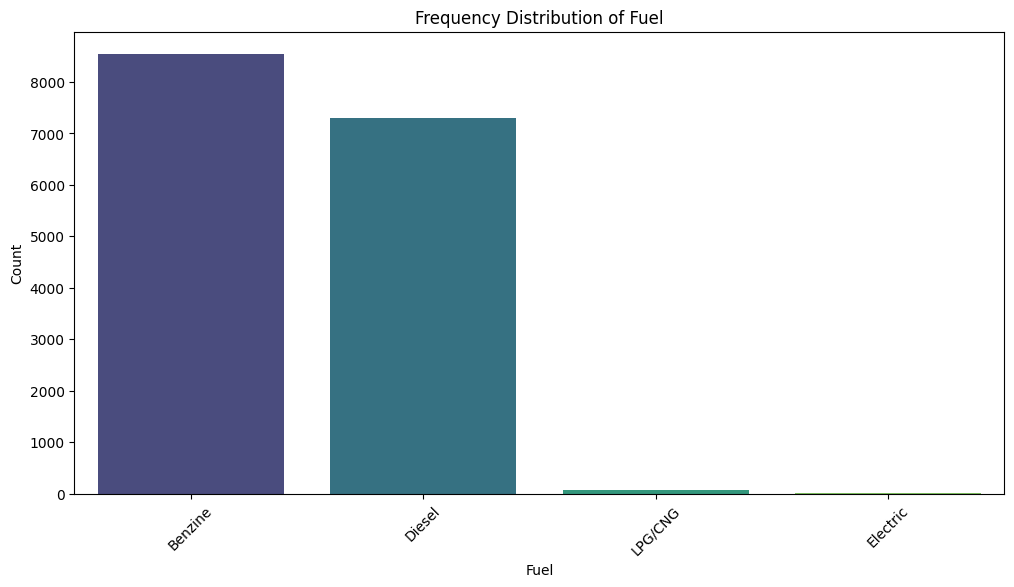

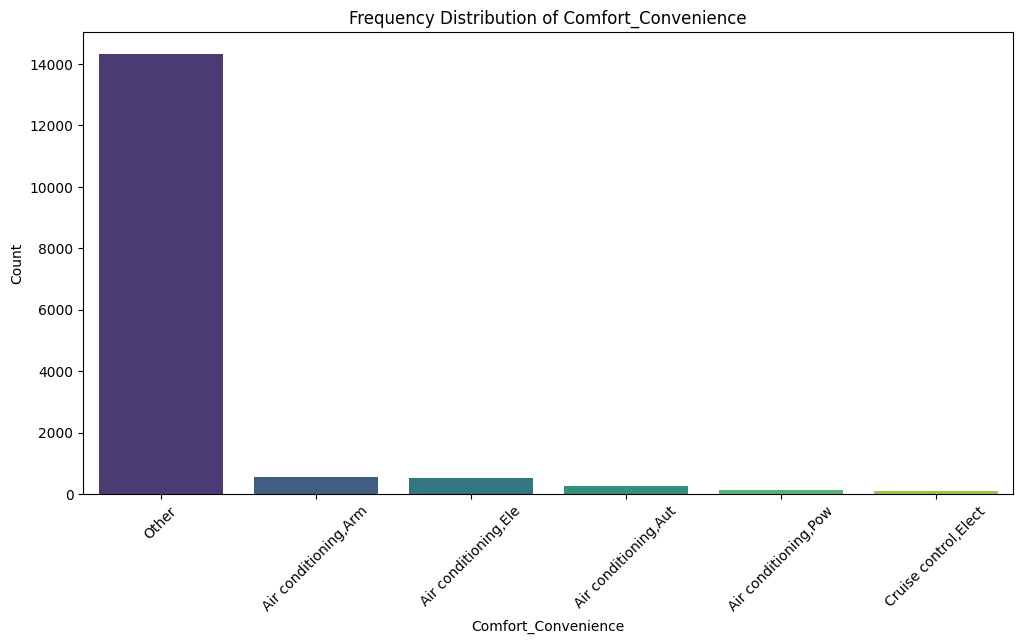

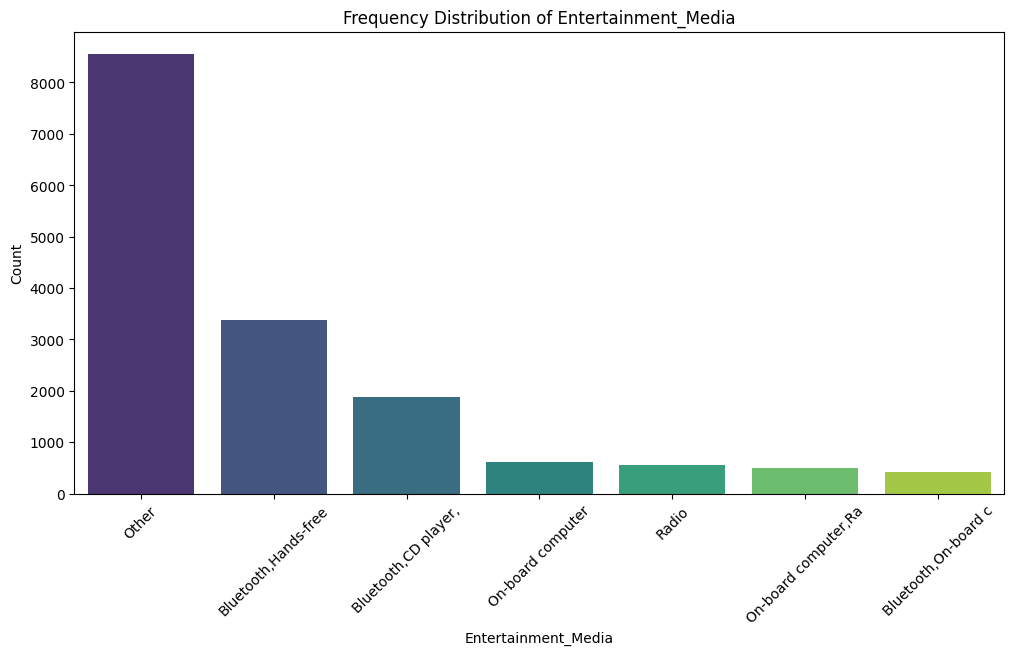

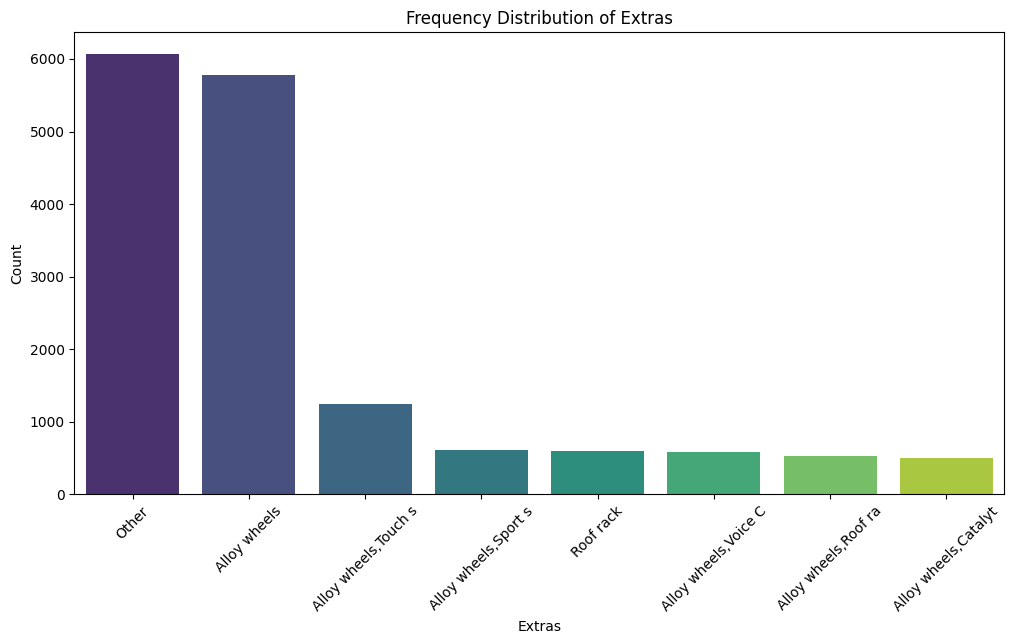

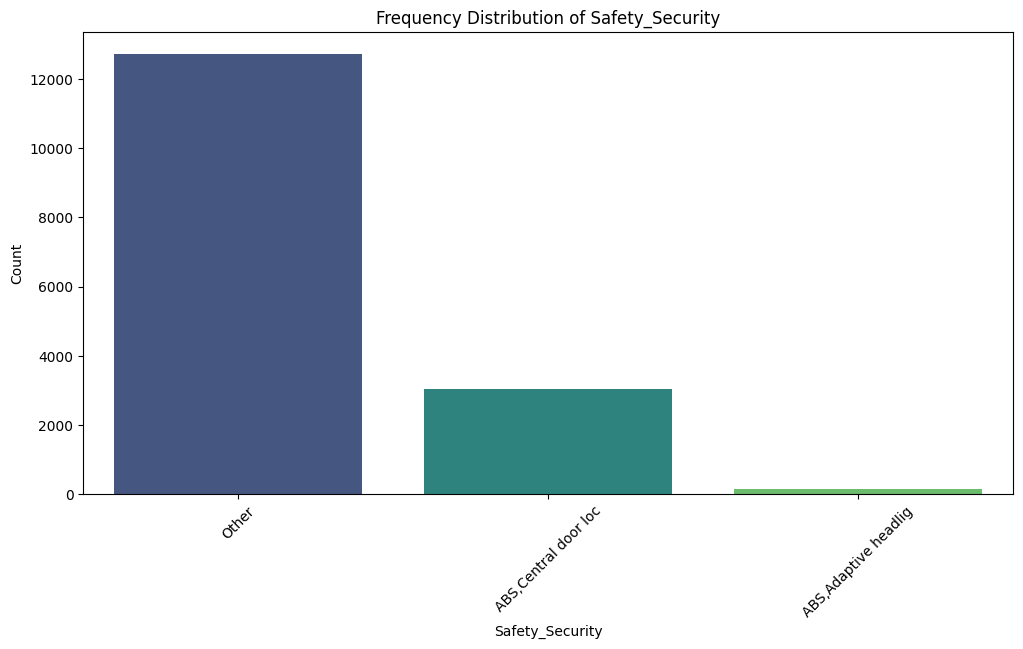

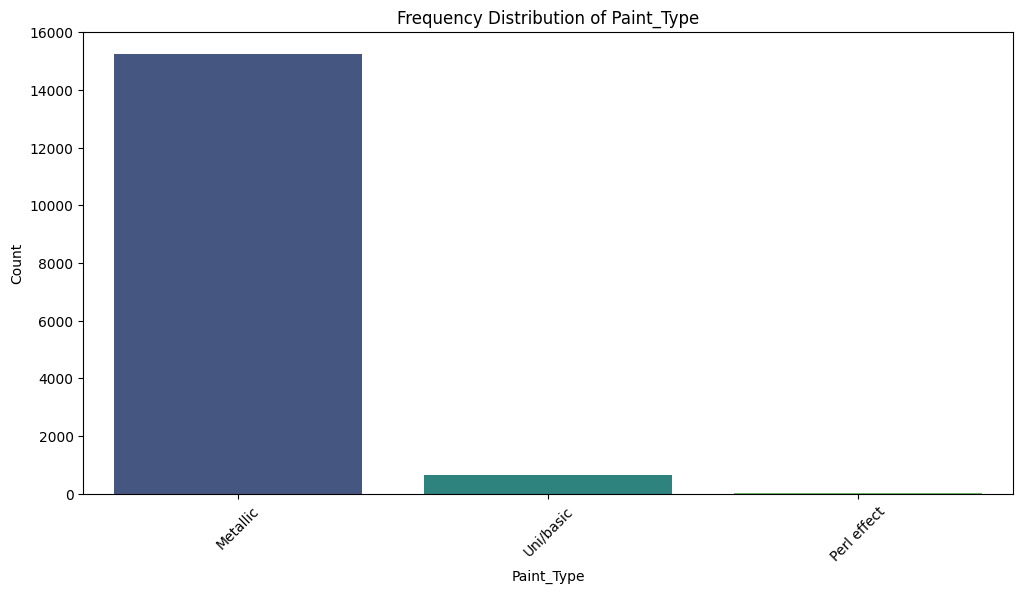

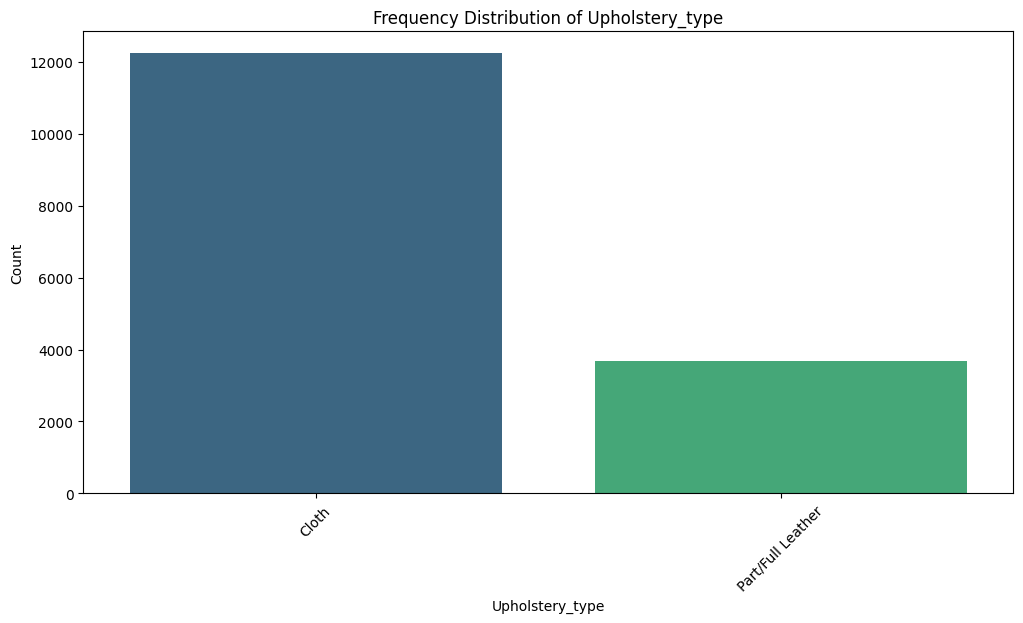

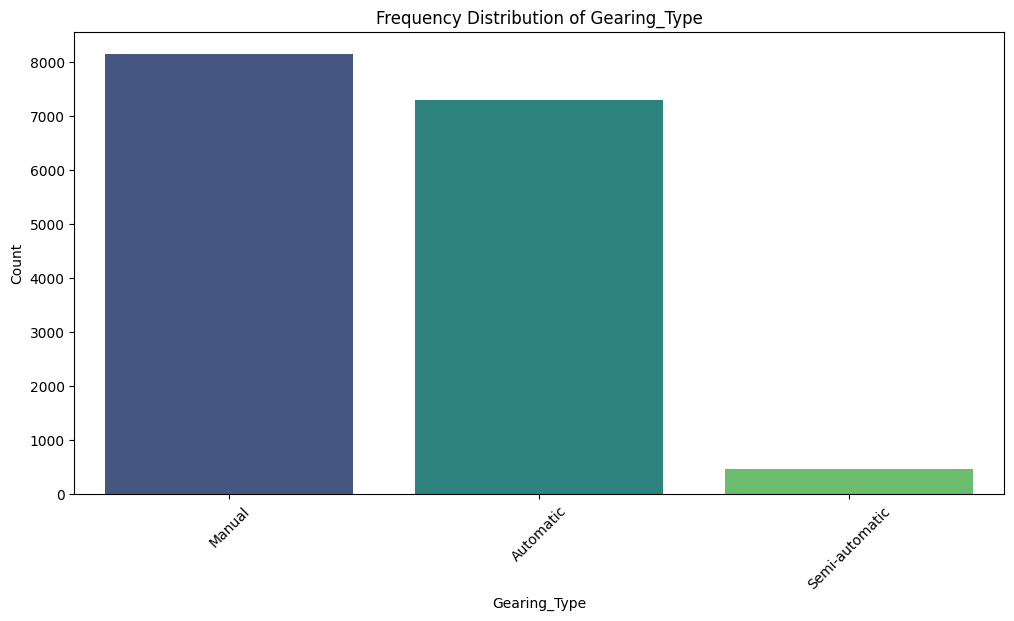

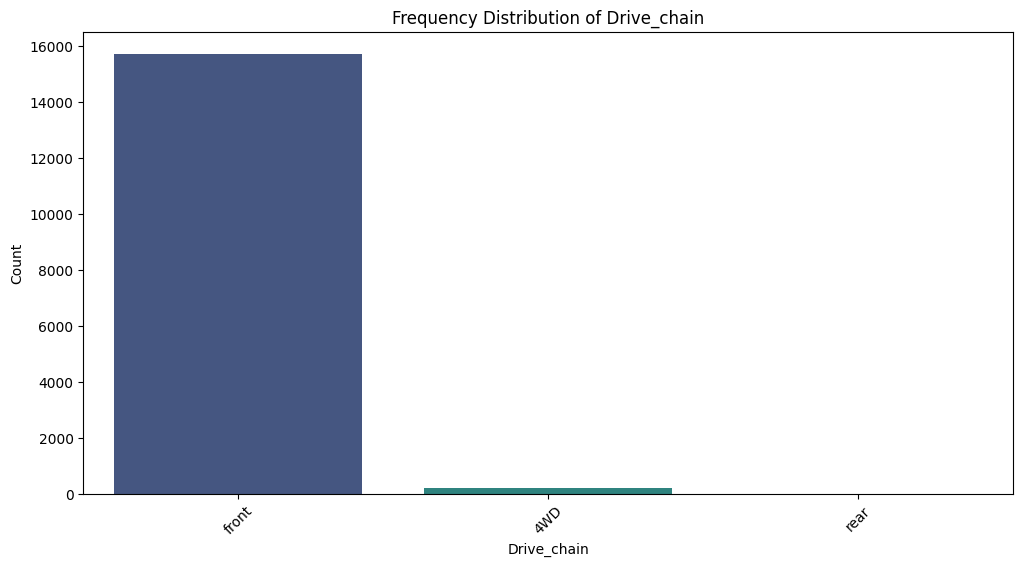

In [19]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Plot bar plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


### 4. Bivariate Analysis
- Bivariate analysis examines relationships between two variables, which can help identify patterns, trends, and correlations. For a regression problem, we typically analyze relationships between features and the target variable. 

4a. Correlation with Target
- We start by examining how numerical features correlate with the target variable (price).

In [20]:
# Compute correlation with the target variable
correlations = df[numeric_cols].corr()['price_log'].sort_values(ascending=False)

# Display the top correlations
print("Top Positive Correlations:")
print(correlations)


Top Positive Correlations:
price_log          1.000000
price              0.962281
hp_kW              0.678024
Gears              0.588194
Weight_kg          0.464597
Displacement_cc    0.254854
cons_comb          0.211097
Inspection_new     0.030927
Previous_Owners   -0.152029
km                -0.419189
age               -0.474618
Name: price_log, dtype: float64


4b. Numerical Features vs. Target

* Visualize Correlation Using a Heatmap:

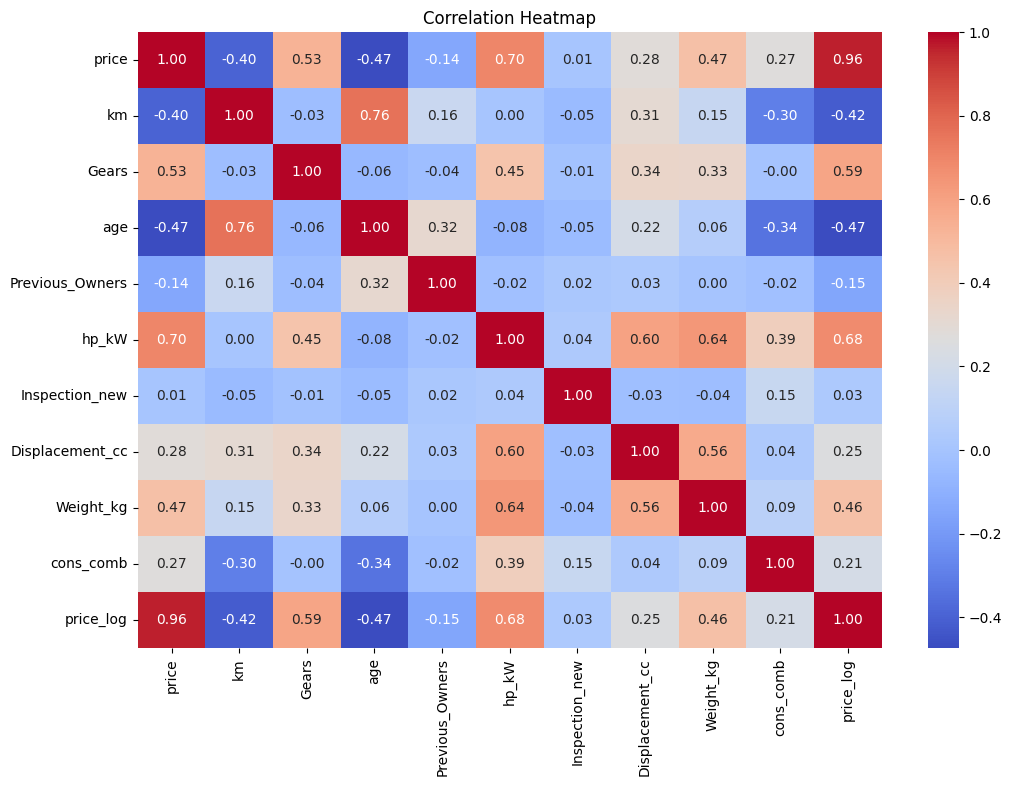

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

4c. Categorical Features vs. Target
- For categorical variables, use boxplots or bar plots to analyze their relationship with the target.

Boxplot Visualization

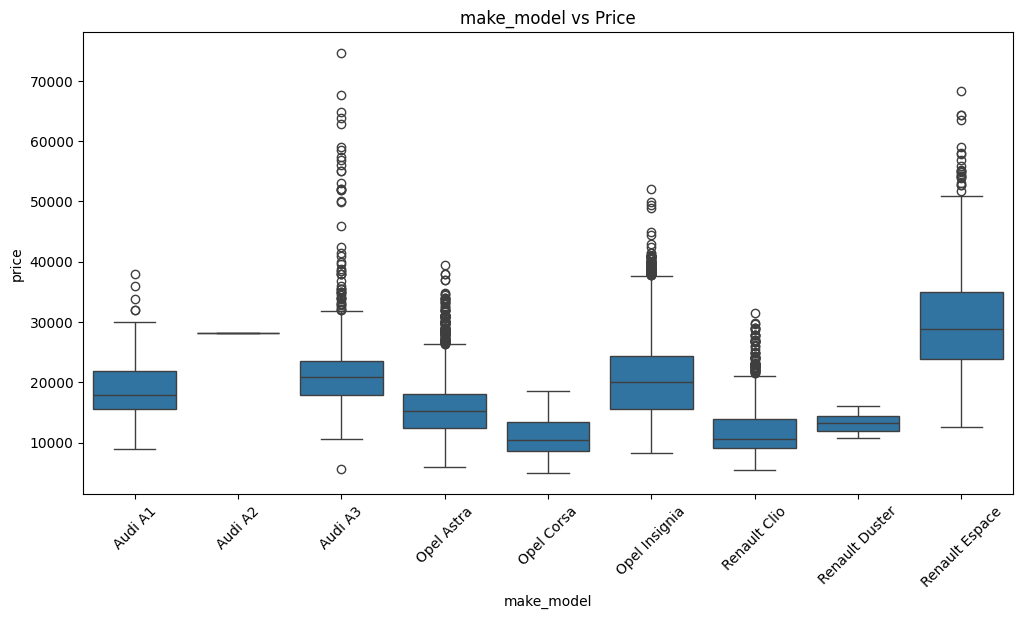

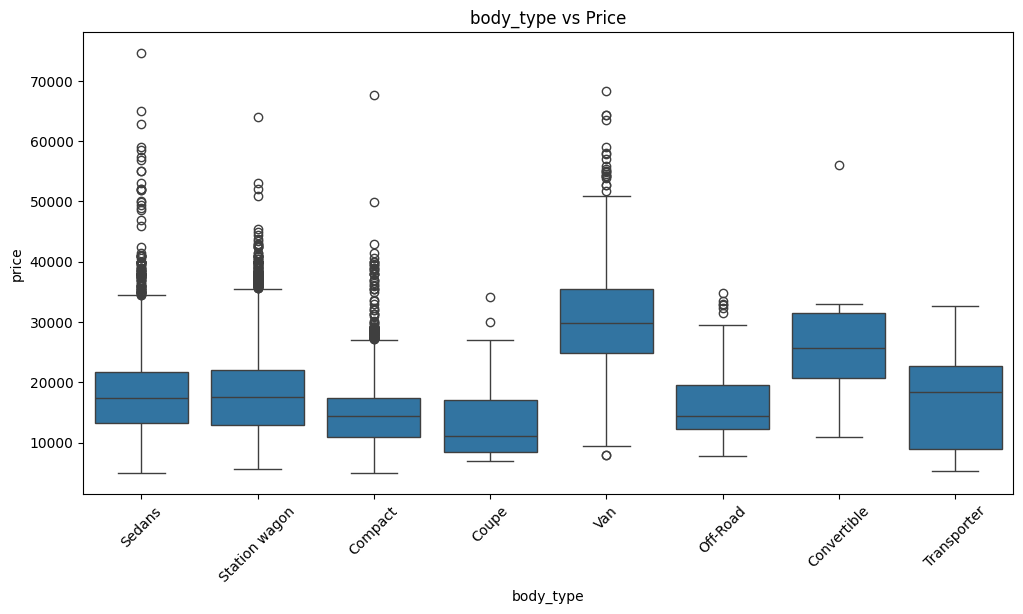

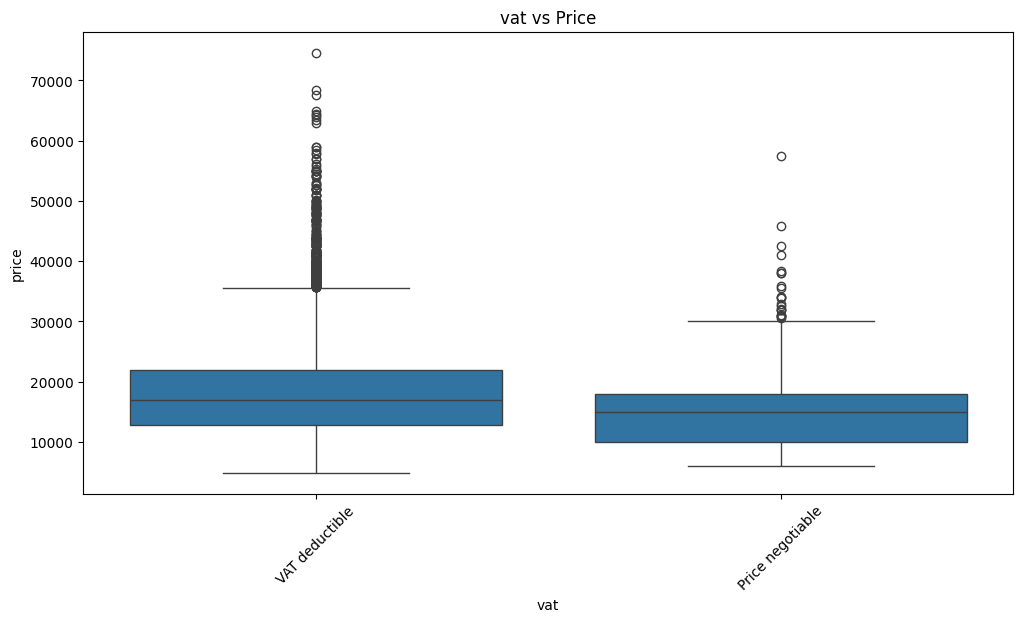

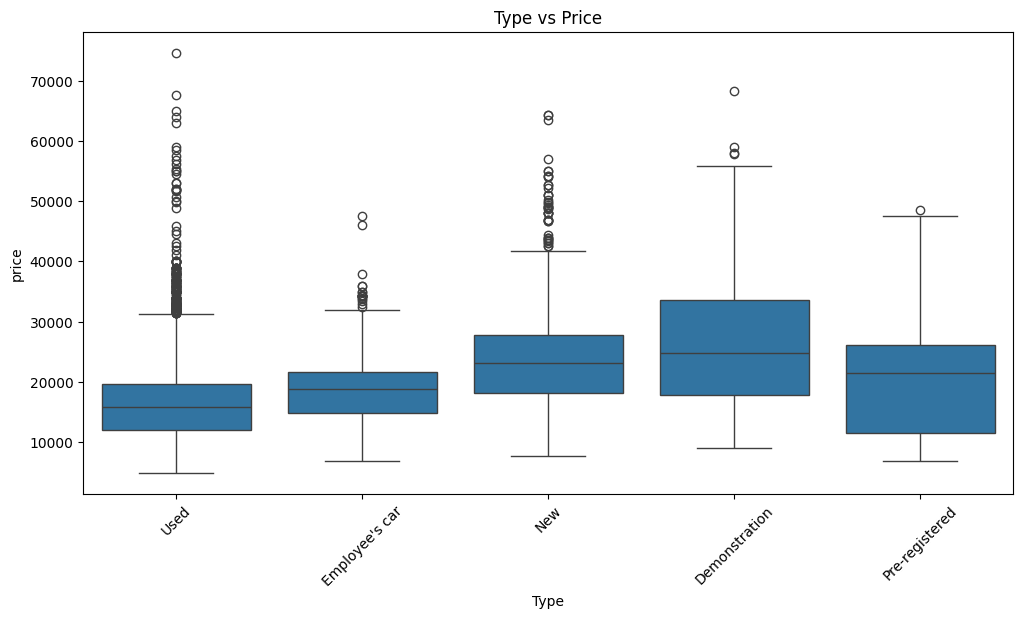

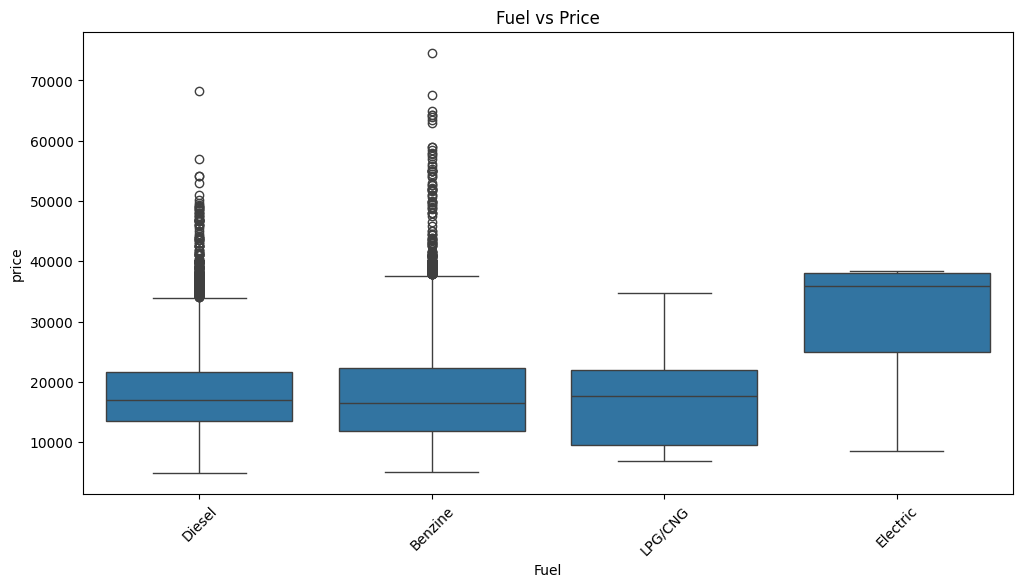

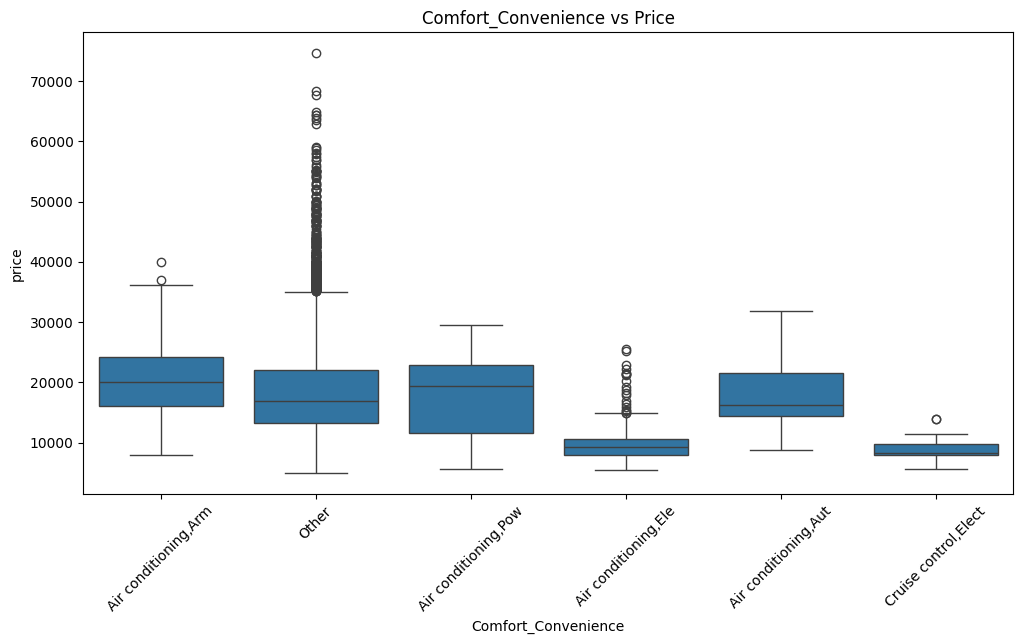

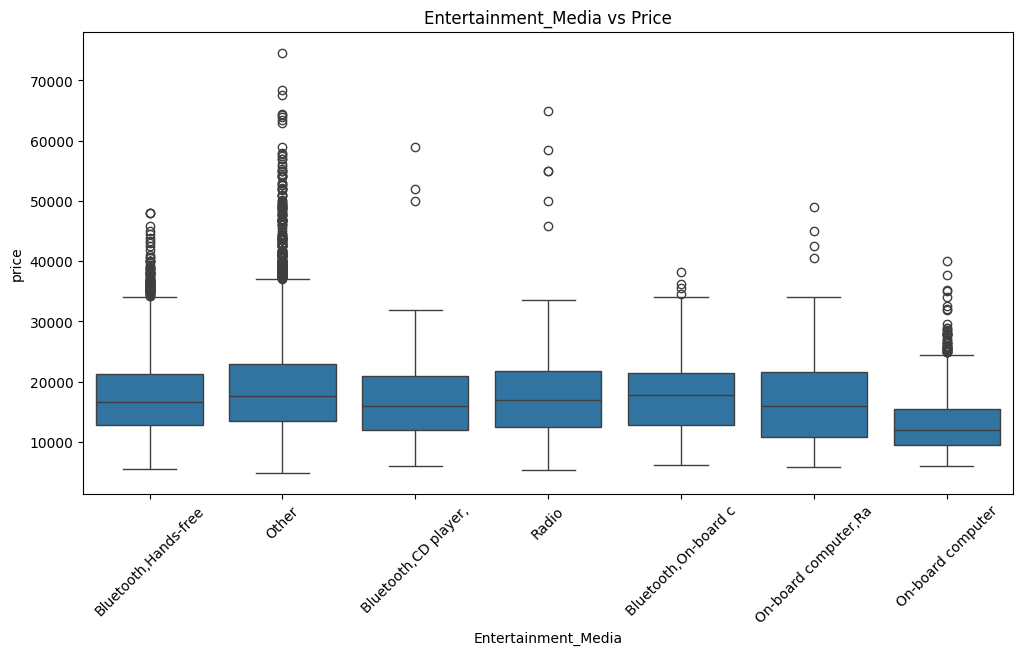

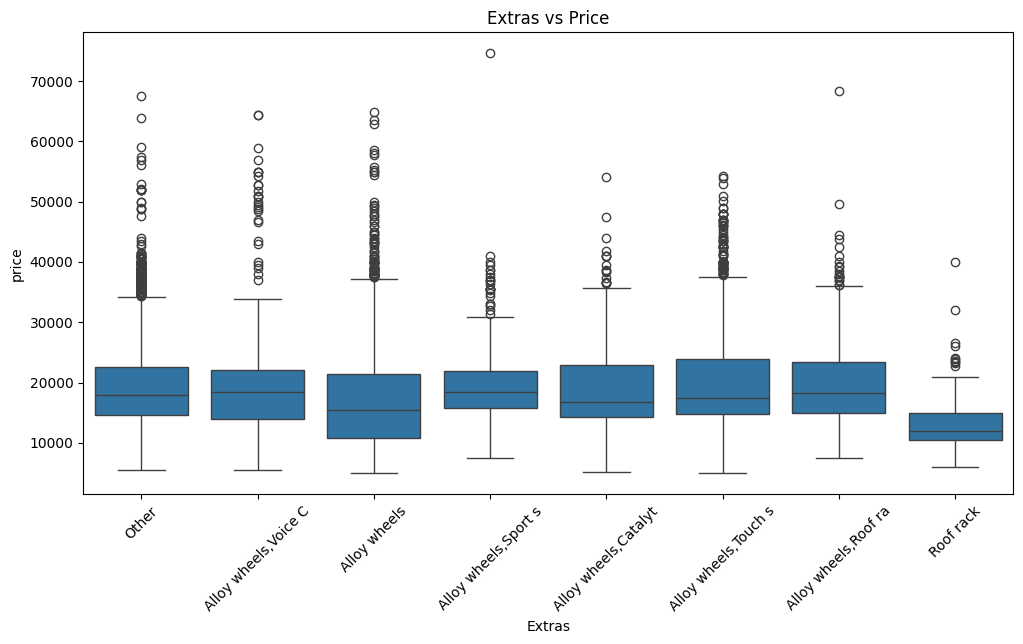

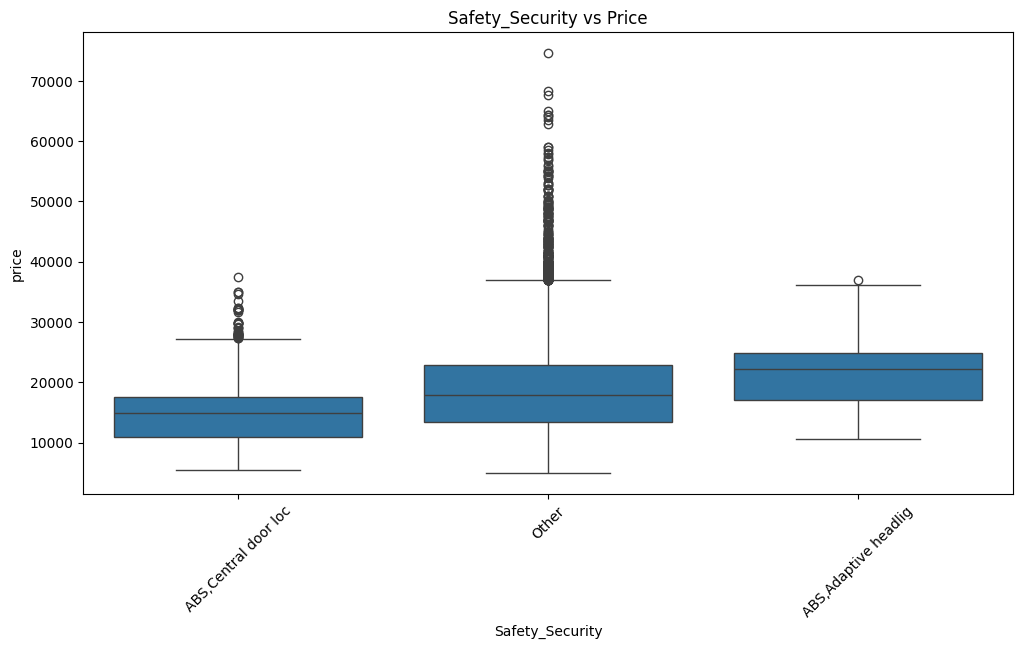

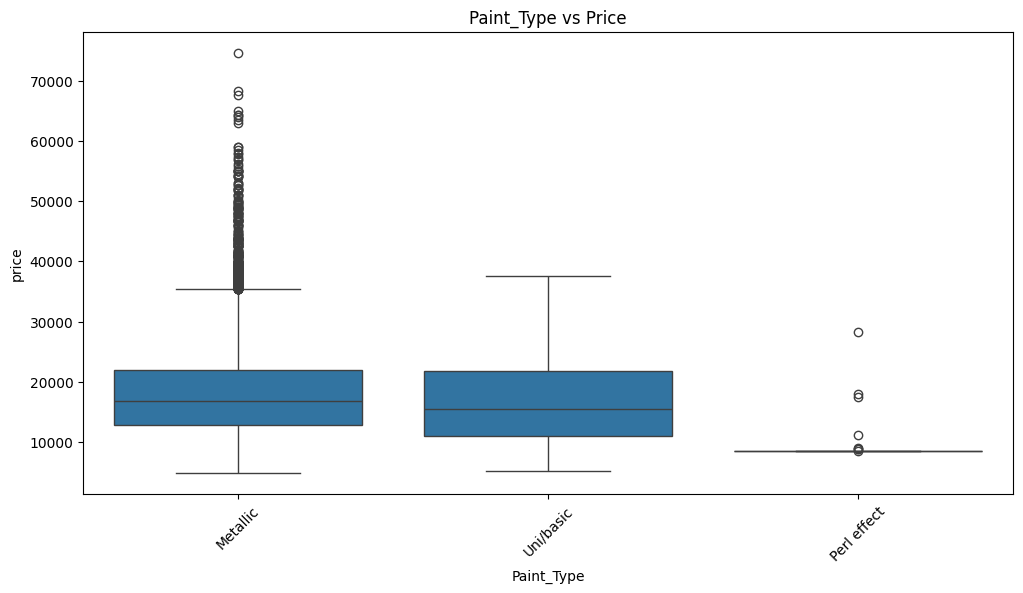

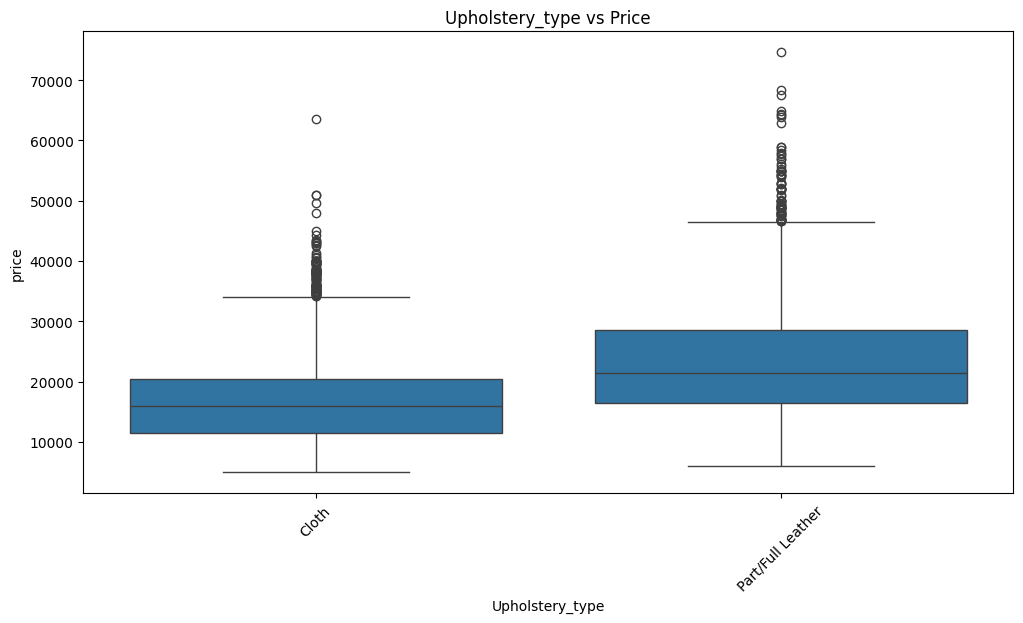

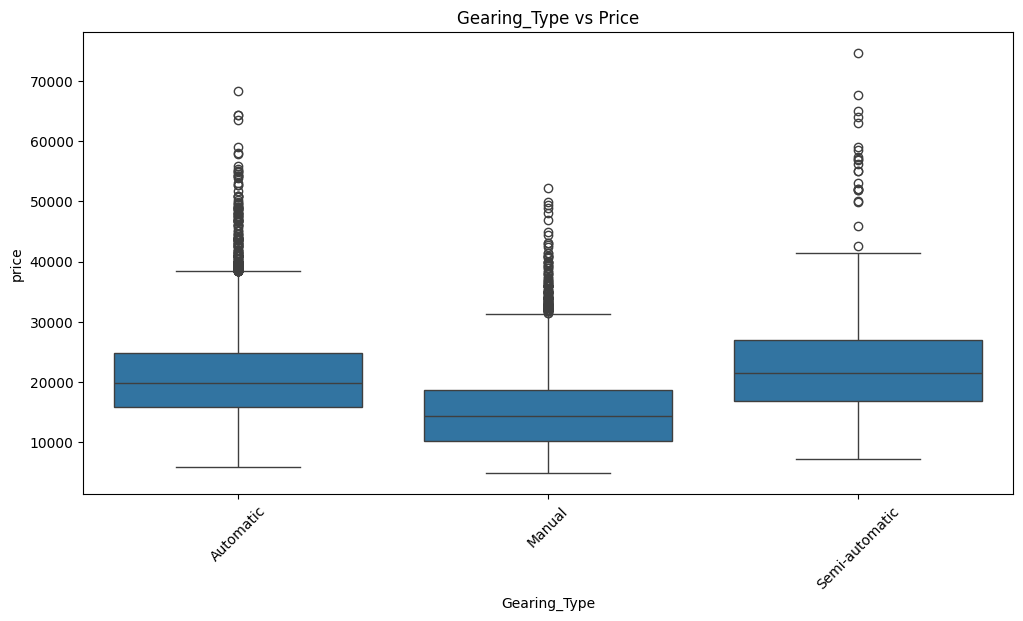

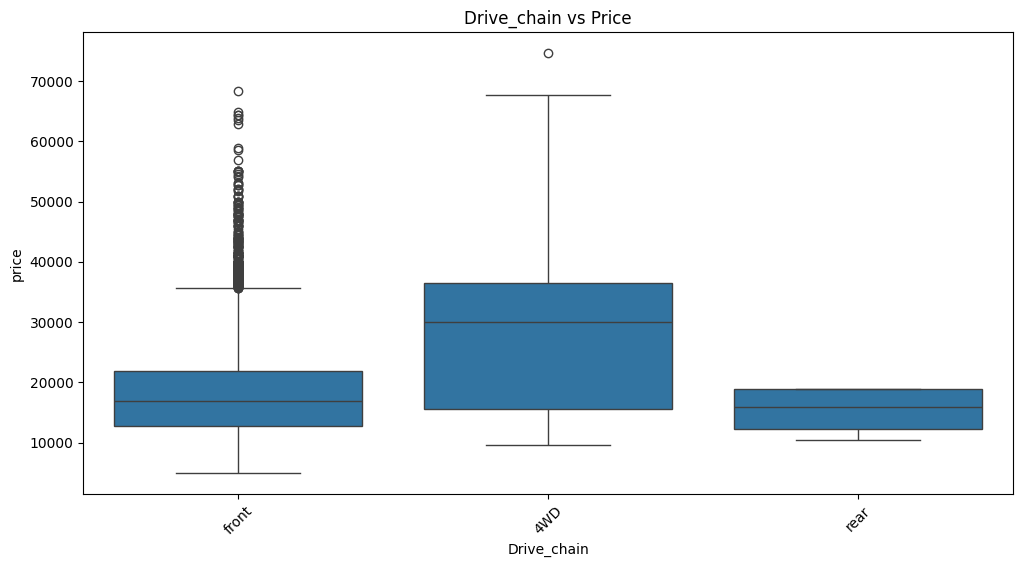

In [22]:
for feature in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f"{feature} vs Price")
    plt.xticks(rotation=45)
    plt.show()

Barplot visualization

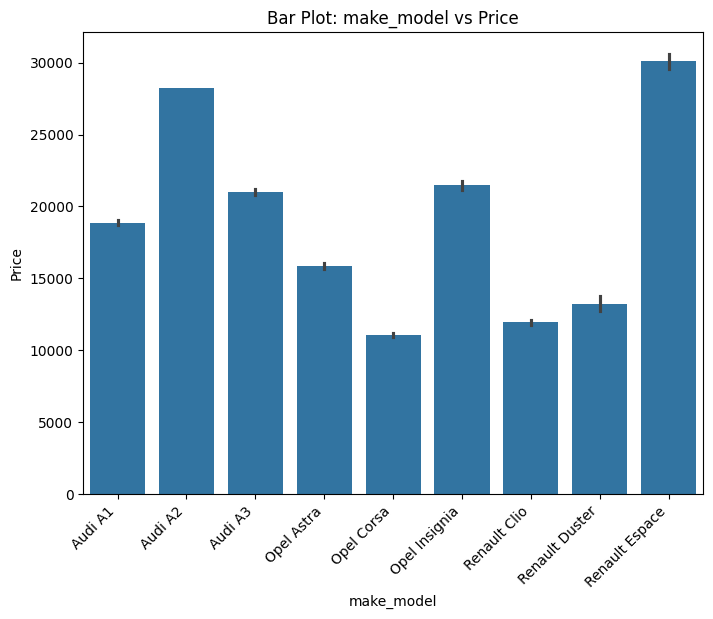

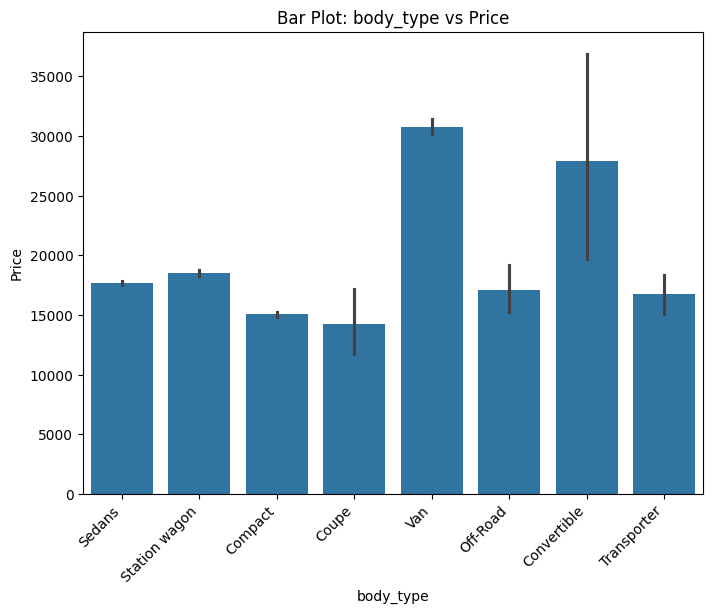

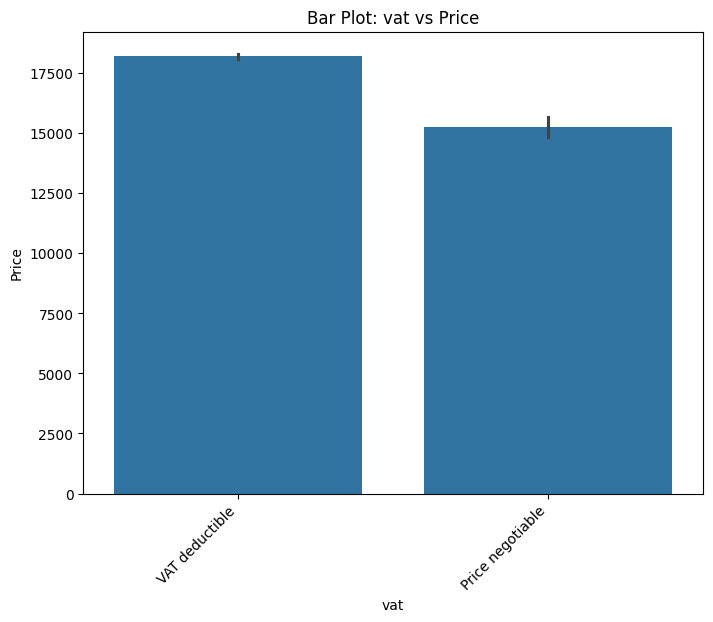

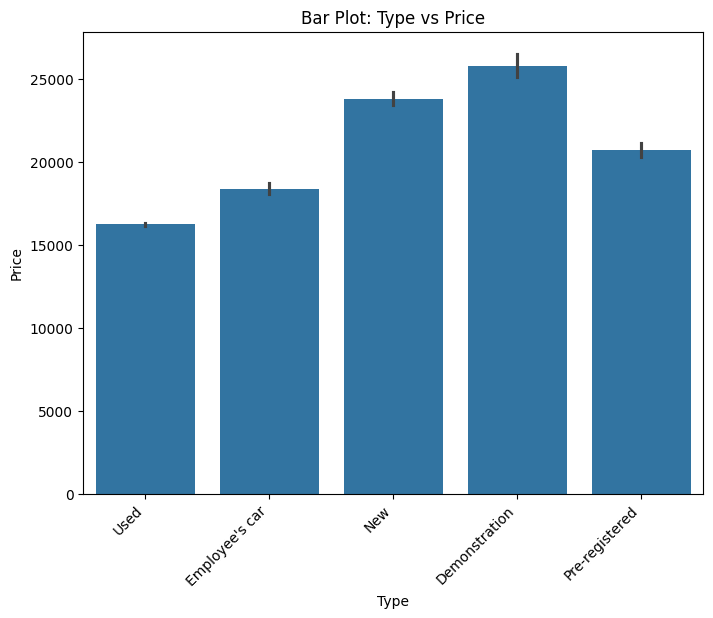

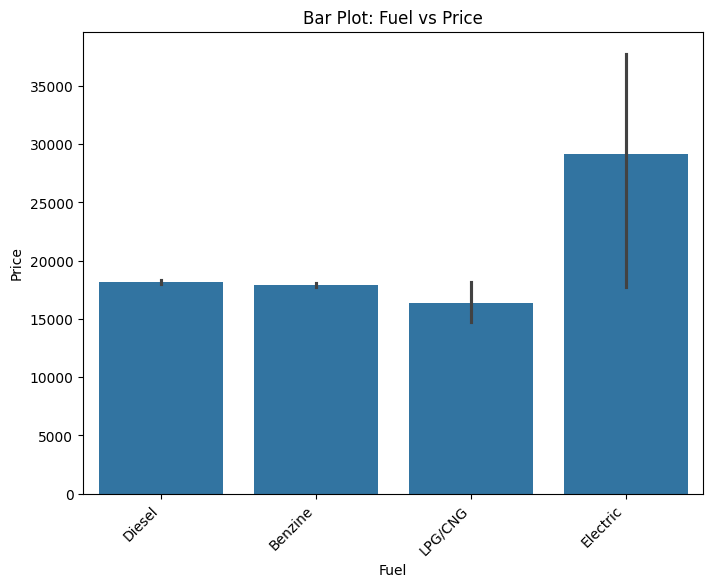

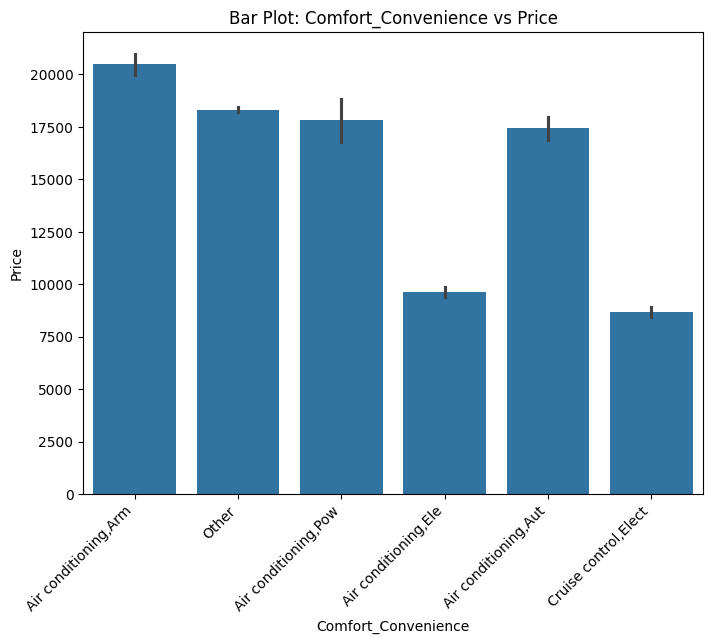

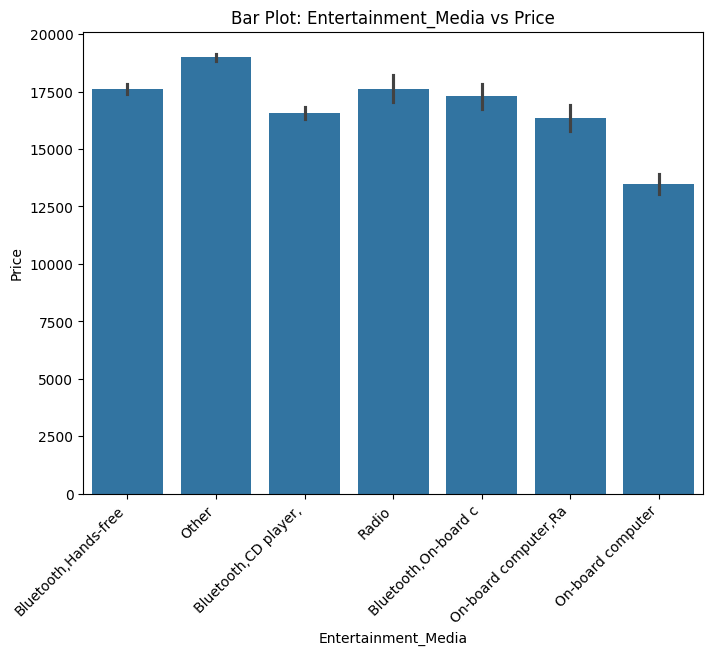

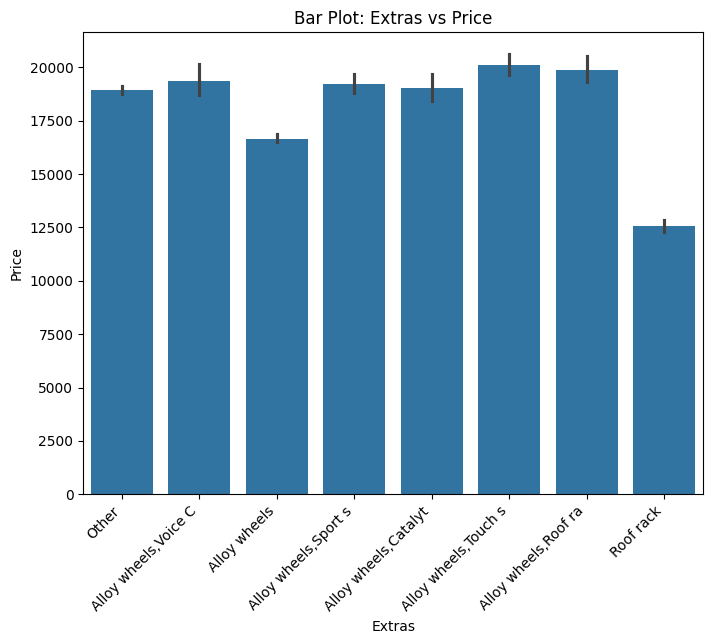

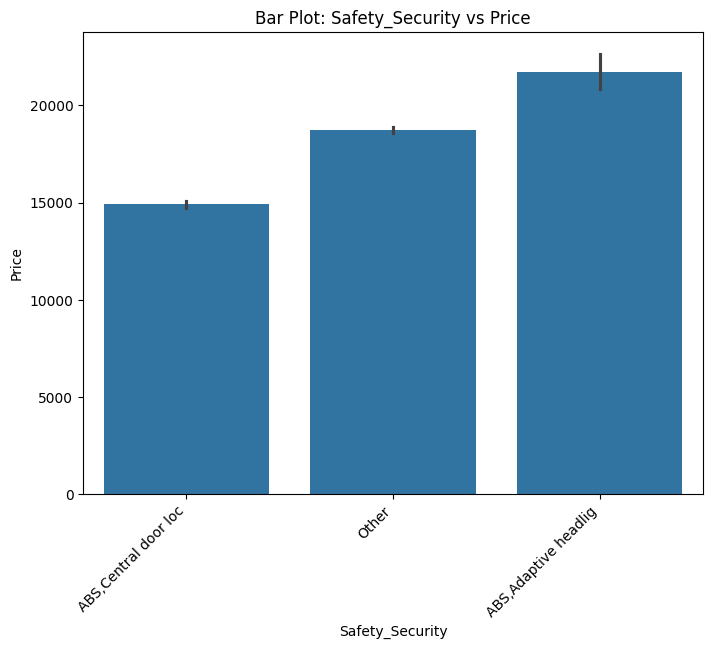

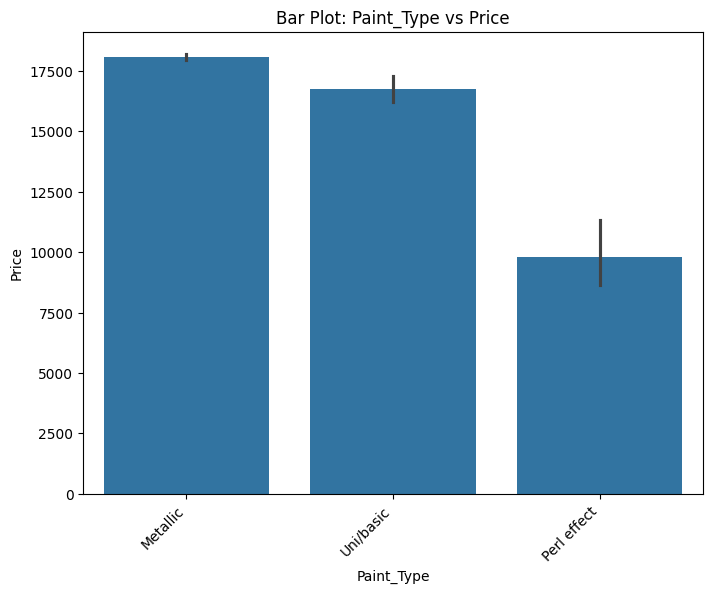

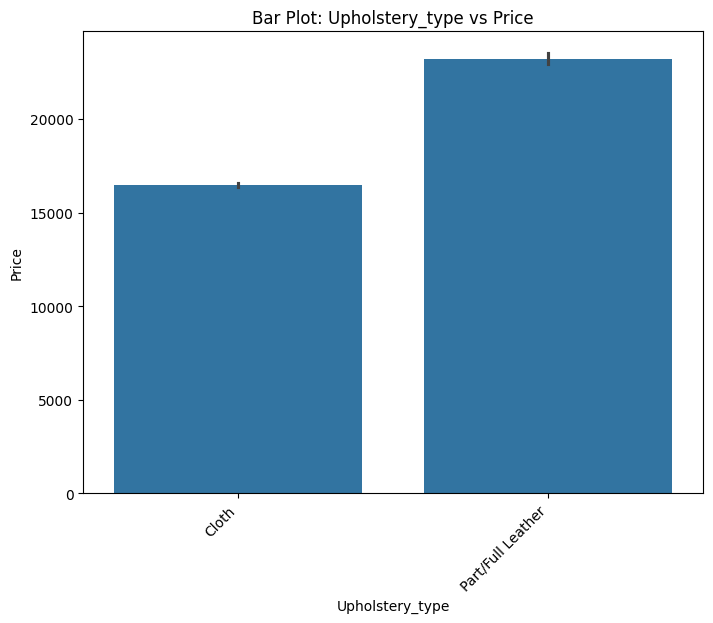

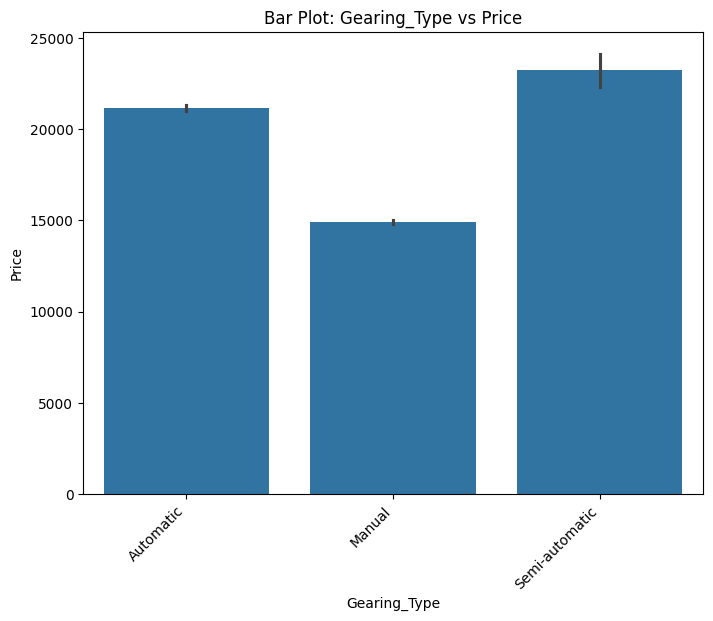

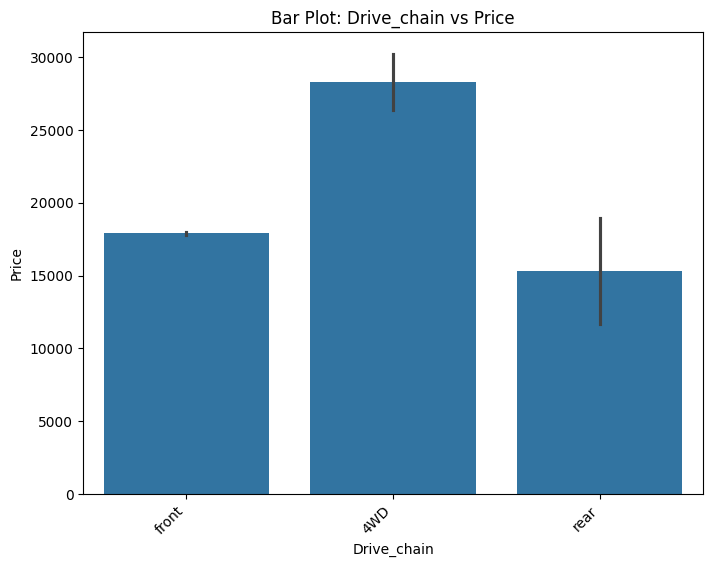

In [23]:
for category in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=df[category], y=df['price'])
    plt.title(f'Bar Plot: {category} vs Price')
    plt.xlabel(category)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
    plt.show()

In [ ]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################